### Description

Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

<b>Objective</b>

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business.

<b>Data Dictionary</b>

S.No. : Serial Number
Name : Name of the car which includes Brand name and Model name
Location : The location in which the car is being sold or is available for purchase Cities
Year : Manufacturing year of the car
Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership
Mileage : The standard mileage offered by the car company in kmpl or km/kg
Engine : The displacement volume of the engine in CC.
Power : The maximum power of the engine in bhp.
Seats : The number of seats in the car.
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn import preprocessing
import math


# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)


In [3]:
cdf = pd.read_csv('F:/d4mlp/used_cars_data.csv',index_col=False)

###<b>Define the problem and perform an Exploratory Data Analysis</b>

<li> Problem definition, questions to be answered - Data background and contents </li>
<li> Univariate analysis </li>
<li> Bivariate analysis </li>

<b> Problem Definition & Content Analysis</b>

In [4]:
cdf.drop(['S.No.'],axis=1,inplace=True)

cdf = cdf[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_Price','Price']]

np.random.seed(1)
cdf.sample(n=100)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,Maruti Swift AMT ZXI,Kochi,2019,15409,Petrol,Automatic,First,22.0 kmpl,1197 CC,81.80 bhp,5.0,NaN,NaN
5948,Skoda Laura L and K AT,Hyderabad,2007,91000,Diesel,Automatic,Second,15.6 kmpl,1896 CC,106 bhp,5.0,NaN,2.45
4911,Honda City V MT,Pune,2012,69000,Petrol,Manual,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.90
4207,Mahindra XUV500 W8 2WD,Mumbai,2015,83000,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,9.00


In [5]:
cdf.shape

(7253, 13)

In [6]:
# We have 7253 Records of Car Inventory, Lets look at the Data Types & Make some assumptions on Data Processing
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [7]:
# Lets take a look at Empty Data, We could use this to make certain pre-processing on data before we get to visualisation
cdf.isnull().sum(axis=0).sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

### Problem Definition & Inference

From the above observations over the data, it has been inferred that we have data on 7253 Car Inventory with Cars4U and their Prices
The Characteritics that define the Inventory is as follows(we have dropped the SL.No column which has not statistical relevance),
<li> Name - Indicator of Make/Model of Car</li>
<li> Location of availability of a Car for Sale - Demographic Indicator of the Car</li>
<li> Manufacturing/Model Year of a Car - Indicator of Age of the Car</li>
<li> Kilometers_Driven - Indicator of the amount of wear and tear of the engine of the Car</li>
<li> Fuel_Type - Indicator of the Price of the Car by Technology(Diesel Cars are cheaper to Operate,Costlier to maintain)</li>
<li> Transmission - Indicator of ease of driving with a Car</li>
<li> Owner_Type - Indicator of saleability of a Car(Single owned cars have better reach in used car market)</li>

The Above Characteristics of the Car are available for every car in Inventory. There are certain additional attributes, which might not be available for every car

<li> Mileage - Indicator of saleability of a Car(Single owned cars have better reach in used car market)</li>
<li> Engine - Indicator of the driving behaviour/fuel economy of a Car </li>
<li> Power - Indicator of driving fizz available with a Car</li>
<li> New_Price - Market Price of a new Car of same model - Indicator of how affordable a used car is</li>
<li> Price - Selling Price - Dependent variable, part of the prediction problem </li>
<li> Seats - Indicator of size of Car</li>

We find certain columns to have units which are not relevant, like Engine is always in Cubic Capacity(CC) the suffix of this could be removed, similarly the Mileage of the Car is in kmpl which could be removed, making an assumption that the entire column treats mileage in kmpl. For Electric Cars also, we shall fit this, since the data is minimal


In [8]:
# We shall take a look at the Statistics of numeric data
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [9]:
cdf.drop(cdf[cdf['Kilometers_Driven']==6500000].index,inplace=True)
#cdf.drop(cdf[cdf['Kilometers_Driven']==6500000],axis=1)
cdf.shape

(7252, 13)

###<b>Other Observations from Numerical Data</b>

<li>Mean Age of Used Cars is at around 8 Years with 2013 as the Year, and 75th Percentile is at around 5 Years</li>
<li>Mean Mileage is 18 Kmpl, with minimum at 15 Kmpl</li>
<li>Based on the numeric Data available, It is evident that the mean Price of a Car is 9.4 Lakhs, with the 25th Percentile at 5.64 Lakhs</li>
<li>Mean Power is 1600CC</li>
<li>Mean Seats are 5</li>
<li>Based on the numeric Data available, It is evident that the mean Kilometres driven is around 59K with a maximum of 6.5Lakh KM</li>


In [10]:
# Convert the Mileage as numbers, implicitly meaning kmpl
cdf['Mileage'] = cdf['Mileage'].apply(lambda x : x.split(' ')[0] if isinstance(x,float) == False else x )  
cdf['Mileage'] = cdf['Mileage'].astype(float)

In [11]:
# We could determine the Age of the Car and Cut them into bins of 0-3 years, 3-5 years, greater than 5-8 years and above if required at the time of Model Building
cdf['Age'] = todays_date.year - cdf['Year']

cdf['Age']

0       11
1        6
2       10
3        9
4        8
        ..
7248    10
7249     6
7250     9
7251     8
7252     7
Name: Age, Length: 7252, dtype: int64

In [12]:
# Convert the Engine Capacity as numbers, implicitly meaning cc
cdf['Engine'] = cdf['Engine'].apply(lambda x : x.split(' ')[0] if isinstance(x,float) == False else x )  
cdf['Engine'] = cdf['Engine'].astype(float)

In [13]:
# Convert the Power Capacity as numbers, implicitly meaning bhp

def transform_power(val):  
    if isinstance(val,str):
        if len(val) == 0:
            ret_val = '0'
        else:
            ret_val = val.split(' ')[0]
            if ret_val == 'null':
                ret_val = '0'
    else:   
        ret_val = str(val)
            
    return np.single(ret_val)        
       
cdf['Power'] = cdf['Power'].apply(transform_power)

In [14]:
# Convert the Engine Capacity as numbers, implicitly meaning lakhs
# We do not have New Price Information on all the Cars, And it is literally impossible to find this data accurately as we also have a lot of discontinued models. At best we could drop this column as more than 70% of New Price Information is missing
cdf['New_Price'] = cdf['New_Price'].apply(lambda x : x.split(' ')[0] if isinstance(x,float) == False else x )  
cdf['New_Price'] = cdf['New_Price'].astype(float)


### Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='Location'>

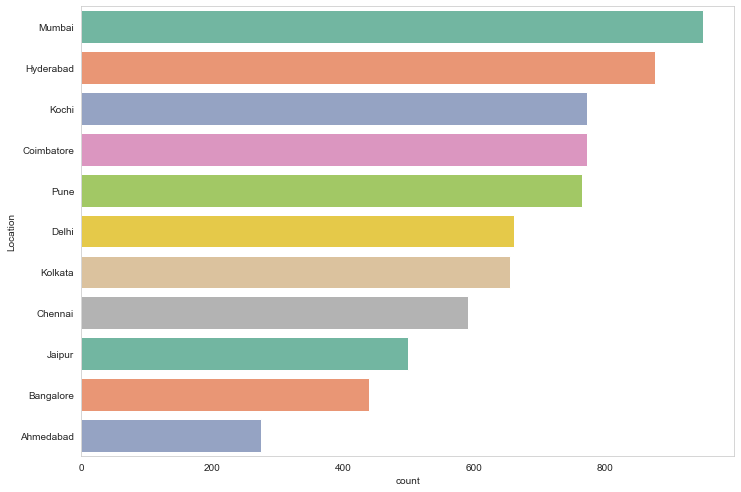

In [15]:
# With the available data set, lets perform Univariate Analysis
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("crest", as_cmap=True)

#sns.displot(data=cdf,x='Location',kde=False,height=8.27, aspect=11.7/8.27)
plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Location",data=cdf,order = cdf['Location'].value_counts().index, palette="Set2")

# Mumbai has maximum number of Cars in Inventory, while Ahmedabad has the minimum number of Cars in Inventory

<AxesSubplot:xlabel='count', ylabel='Make'>

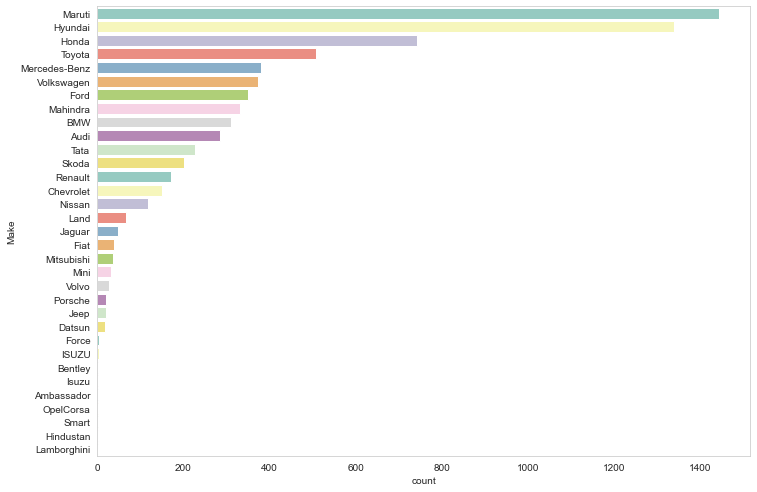

In [16]:
#The Name Column, does not make much sense on a Stand alone basis, But the Make/Model information could be engineered, and we could even consider using the Make to determine the Brand type as Luxury or Mid or Budget
cdf['Make'] = cdf['Name'].apply(lambda x: 'NA' if len(x) == 0 else x.split(" ")[0])
cdf['Model'] = cdf['Name'].apply(lambda x: 'NA' if len(x) == 0 else x.split(" ")[1])
cdf['Make_Model'] = cdf['Make'] + cdf['Model']
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.displot(data=cdf,x='Make_Model',kde=False,height=12, aspect=16/12)
plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Make",data=cdf,order = cdf['Make'].value_counts().index, palette="Set3")

# With 1444 count, Maruti has maximum Models in Inventory, followed by Hyundai while brands like Opel and Lamborgini are just 1 in Inventory

In [17]:
cdf['Make'].value_counts(ascending=False)

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Force               3
ISUZU               3
Bentley             2
Isuzu               2
Ambassador          1
OpelCorsa           1
Smart               1
Hindustan           1
Lamborghini         1
Name: Make, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

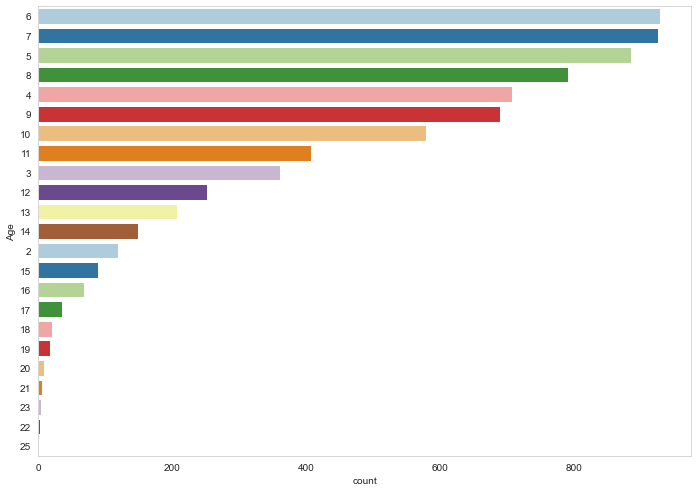

In [18]:
#sns.displot(data=cdf,x='Age',kde=False,height=8.27, aspect=11.7/8.27)
#sns.displot(data=cdf,x='Make_Model',kde=False,height=12, aspect=16/12)
plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Age",data=cdf,order = cdf['Age'].value_counts().index, palette="Paired")

# Most of the used cars are from years 2014 to 2016 

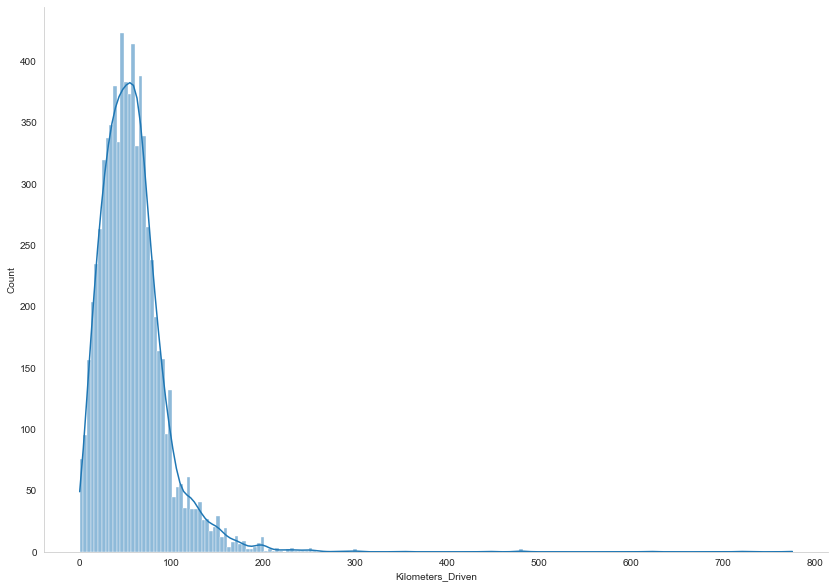

In [19]:
#sns.displot(data=cdf,x='Kilometers_Driven',kde=False,height=8.27, aspect=11.7/8.27)

cdf['Kilometers_Driven'] = cdf['Kilometers_Driven']/1000
sns.displot(data=cdf,x='Kilometers_Driven',kde=True,height=8.27, aspect=11.7/8.27)
# Most of the Cars are driven for less than a Lakh kilometres

In [20]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.364865,3.254365,1996.000,2011.000,2014.000000,2016.000000,2019.00
Kilometers_Driven,7252.0,57.810853,37.499537,0.171,34.000,53.404000,73.000000,775.00
Mileage,7250.0,18.141880,4.562440,0.000,15.170,18.160000,21.100000,33.54
Engine,7206.0,1616.382459,595.105530,72.000,1198.000,1493.000000,1968.000000,5998.00
Power,7206.0,110.726365,55.057319,0.000,74.000,91.709999,138.029999,616.00
Seats,7199.0,5.279761,0.811709,0.000,5.000,5.000000,5.000000,10.00
New_Price,1006.0,19.894324,19.813947,1.000,7.635,11.270000,23.640000,99.92
Price,6018.0,9.470243,11.165926,0.440,3.500,5.640000,9.950000,160.00
Age,7252.0,7.635135,3.254365,2.000,5.000,7.000000,10.000000,25.00


<AxesSubplot:xlabel='count', ylabel='Fuel_Type'>

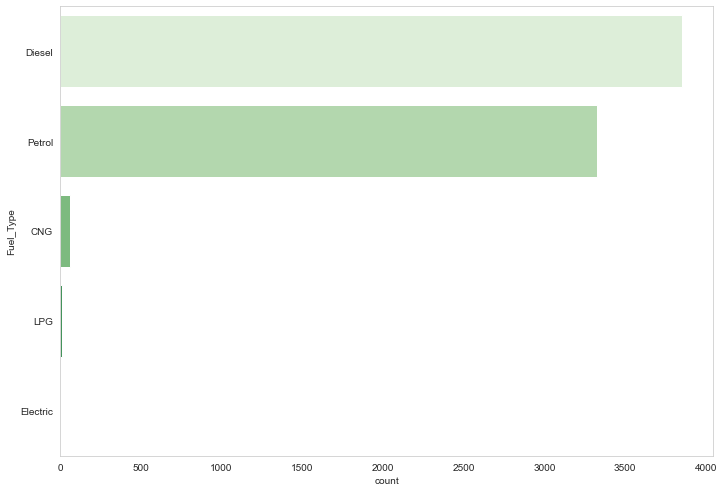

In [21]:
#sns.displot(data=cdf,x='Fuel_Type',kde=False,height=8.27, aspect=11.7/8.27)
plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Fuel_Type",data=cdf,order = cdf['Fuel_Type'].value_counts().index, palette="Greens")
# 3852 Diesel Cars and are inventoried the most, followed by Petrol at 3325, while there are 62 CNG Cars available 


<AxesSubplot:xlabel='count', ylabel='Owner_Type'>

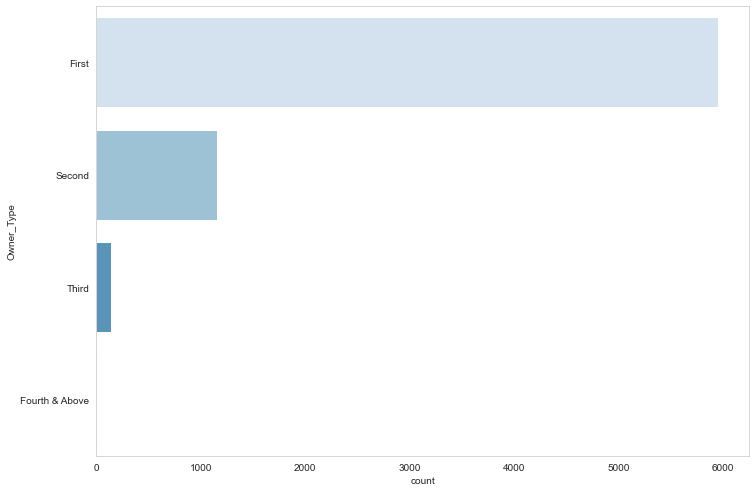

In [22]:
plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Owner_Type",data=cdf,order = cdf['Owner_Type'].value_counts().index, palette="Blues")

#sns.displot(data=cdf,x='Owner_Type',kde=False,height=8.27, aspect=11.7/8.27)
#cdf['Owner_Type'].value_counts()
# There are 5952 First Owner cars, followed by 1152 Second Owned Cars

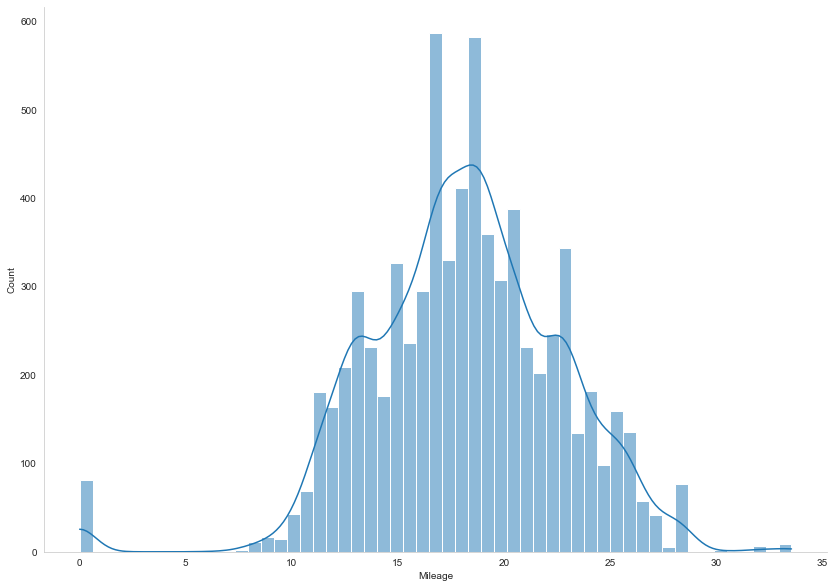

In [23]:
sns.displot(data=cdf,x='Mileage',kde=True,height=8.27, aspect=11.7/8.27)
# The Mileage is following normal distribution, how ever this will have to be studied in correlation with whether the Car is Petrol or Diesel and the Age of the Car

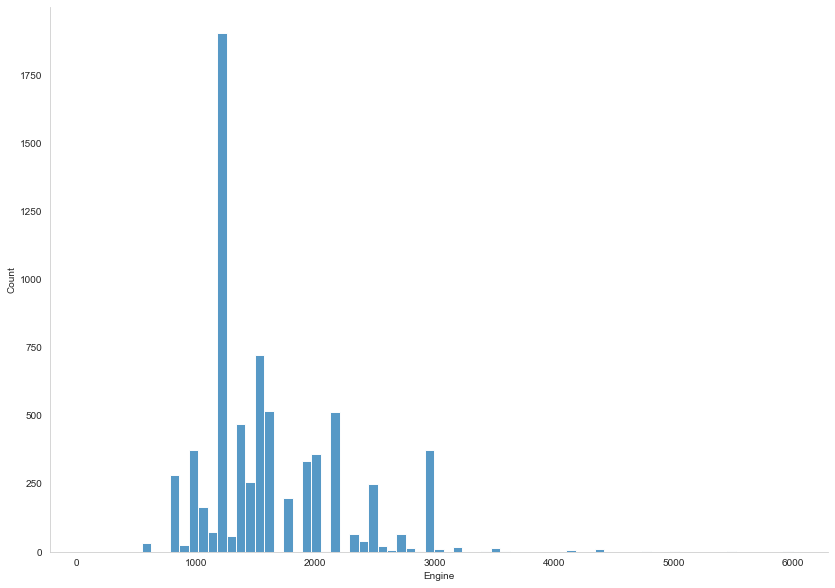

In [24]:
sns.displot(data=cdf,x='Engine',kde=False,height=8.27, aspect=11.7/8.27)
#cdf['Engine'].value_counts(ascending=False)

#plt.figure(figsize=(11.7,8.27))
#sns.countplot(y="Engine",data=cdf,order = cdf['Engine'].value_counts().index, palette="Blues")
# Most of the Carsd are under 1500 CC, this follows the pattern of maximum new cars sold in India are under 1500 CC to take advantage of lower excise duty for such cars

In [25]:
# With Most of the Data converted into numbers, lets relook at the data types
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   float64
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   float64
 8   Engine             7206 non-null   float64
 9   Power              7206 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6018 non-null   float64
 13  Age                7252 non-null   int64  
 14  Make               7252 non-null   object 
 15  Model              7252 non-null   object 
 16  Make_Model         7252 

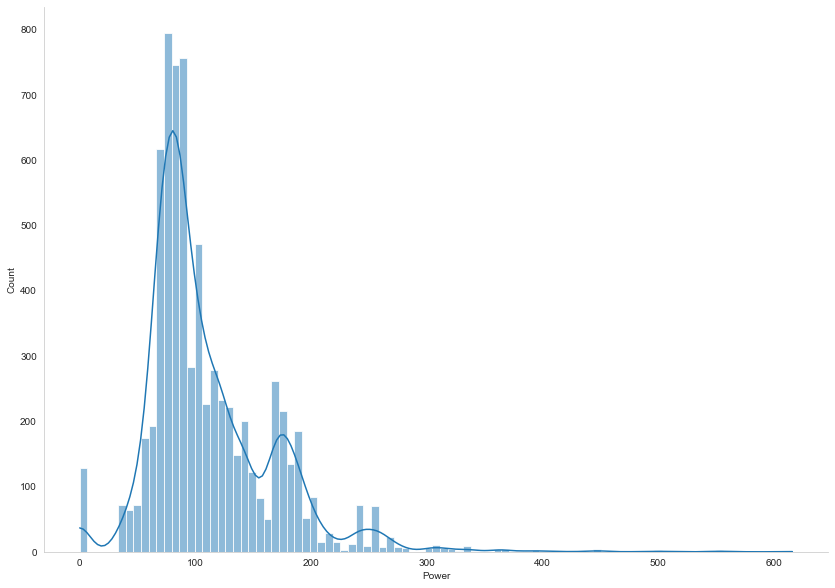

In [26]:
sns.displot(data=cdf,x='Power',kde=True,height=8.27, aspect=11.7/8.27)
# Most of the Cars are under 100 bhp

<AxesSubplot:xlabel='count', ylabel='Seats'>

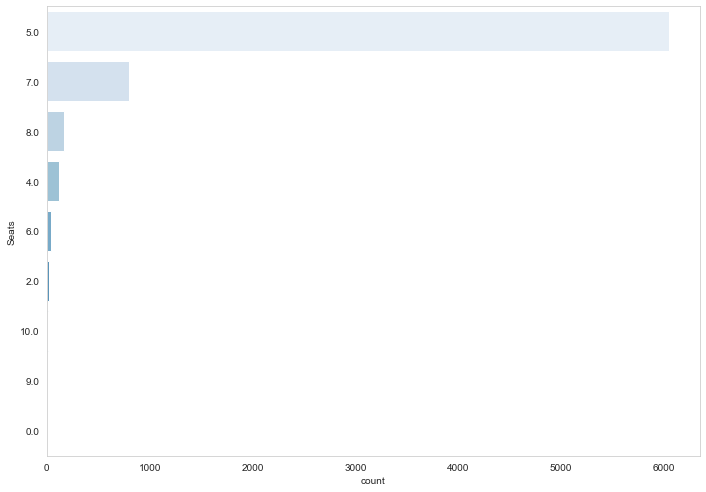

In [27]:
#sns.displot(data=cdf,x='Seats',kde=False,height=8.27, aspect=11.7/8.27)

plt.figure(figsize=(11.7,8.27))
sns.countplot(y="Seats",data=cdf,order = cdf['Seats'].value_counts().index, palette="Blues")

# Most of the Cars have 5 seats

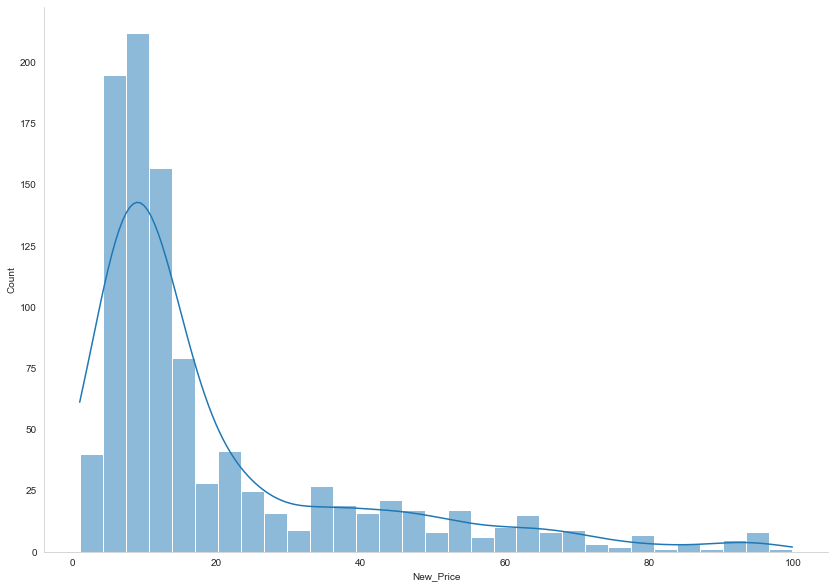

In [28]:
sns.displot(data=cdf,x='New_Price',kde=True,height=8.27, aspect=11.7/8.27)

# New Car Prices are mostly under 15 Lakhs as we could infer from the below graph

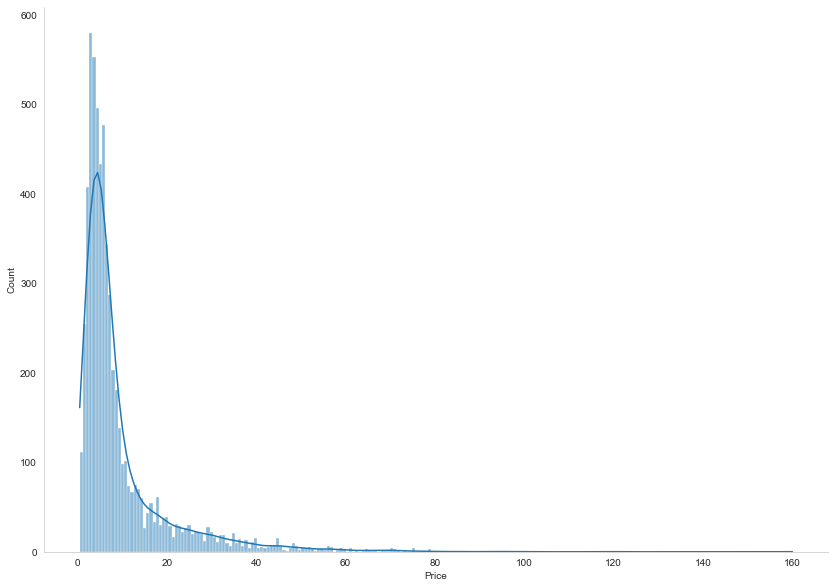

In [29]:
sns.displot(data=cdf,x='Price',kde=True,height=8.27, aspect=11.7/8.27)

# The Price of used cars are following a partial KDE distribution pattern peaking at 10 Lakhs, and after which it goes on an exponential decay, could be indicative of age of the Car

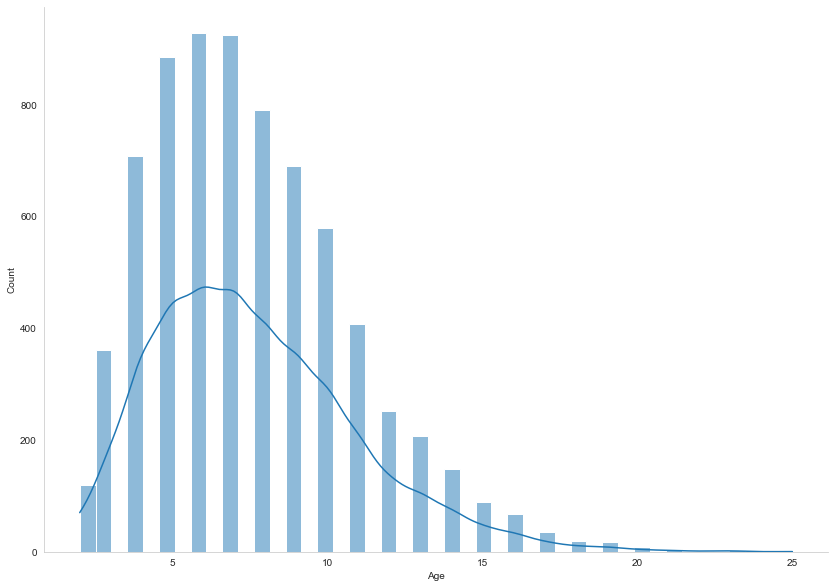

In [30]:
sns.displot(data=cdf,x='Age',kde=True,height=8.27, aspect=11.7/8.27)


### Univariate Analysis Combined Inferences
1. Mumbai has maximum number of Cars in Inventory, while Ahmedabad has the minimum number of Cars in Inventory
2. With 1444 count, Maruti has maximum Models in Inventory, followed by Hyundai while brands like Opel and Lamborgini are just 1 in Inventory
3. Most of the used cars are from years 2014 to 2016 
4. Most of the Cars are driven for less than a Lakh kilometres
5. 3852 Diesel Cars and are inventoried the most, followed by Petrol at 3325, while there are 62 CNG Cars available 
6. There are 5952 First Owner cars, followed by 1152 Second Owned Cars
7. The Mileage is following normal distribution, how ever this will have to be studied in correlation with whether the Car is Petrol or Diesel and the Age of the Car
8. Most of the Carsd are under 1500 CC, this follows the pattern of maximum new cars sold in India are under 1500 CC to take advantage of lower excise duty for such cars
9. With Most of the Data converted into numbers, lets relook at the data types
10. Most of the Cars are under 100 bhp
11. Most of the Cars have 5 seats
12. New Car Prices are mostly under 15 Lakhs as we could infer from the below graph
13. The Price of used cars are following a partial KDE distribution pattern peaking at 10 Lakhs, and after which it goes on an exponential decay, could be indicative of age of the Car

### BiVariate Analysis

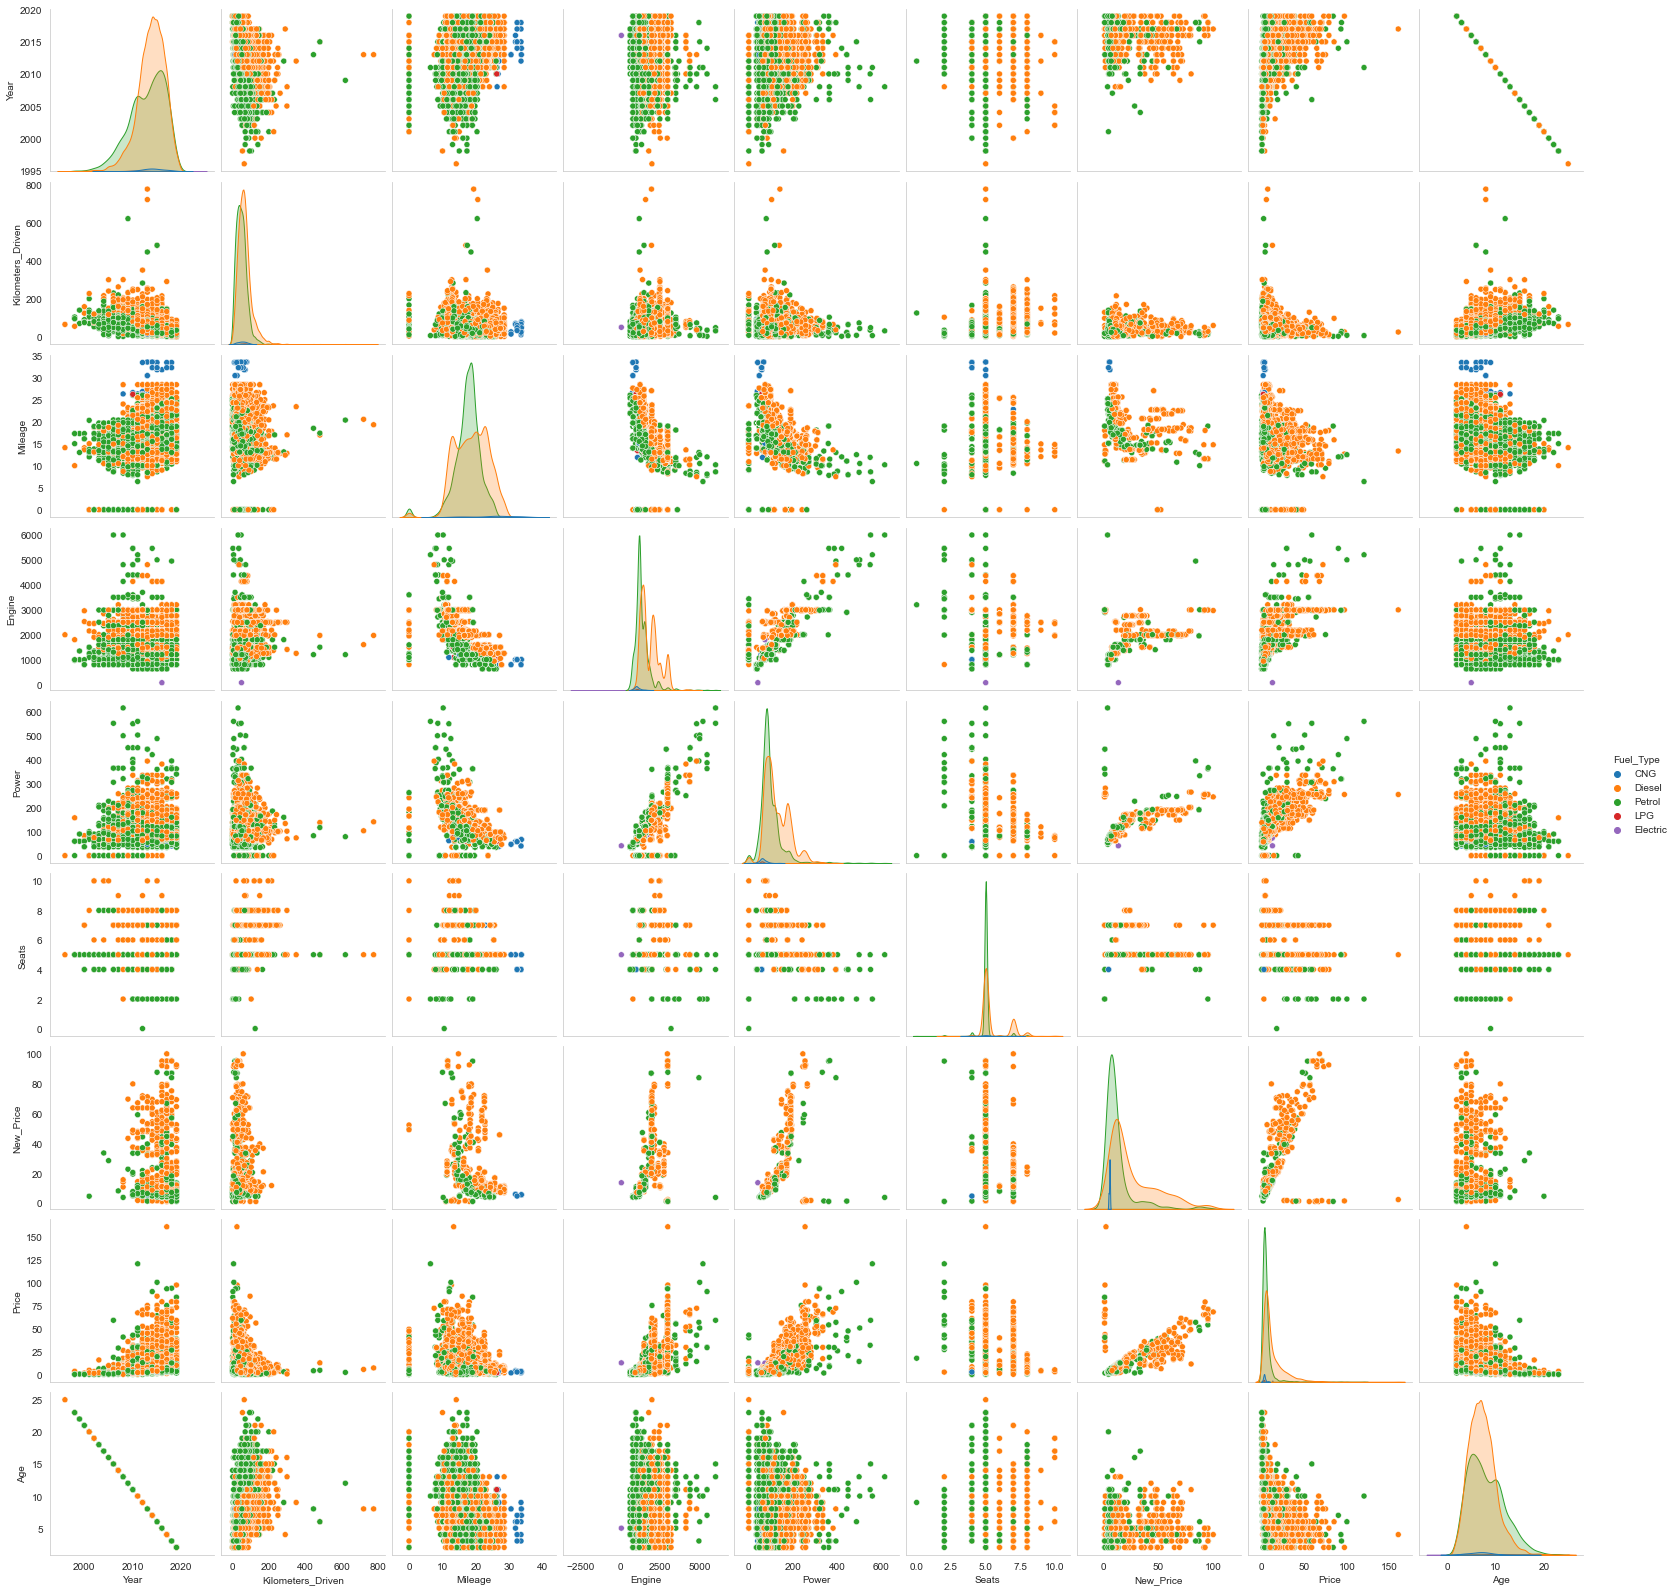

In [31]:
sns.pairplot(cdf,hue='Fuel_Type')


### Observations from Pair - Plot

1. The Price of the Car Increases with Year of the Model, which is in line with reality in Used Car Markets
2. The Larger the Mileage, Lower the Price, some Models have a lower Price Tag on lower miles, these needs to be correlated with Age and KM run
3. The Engine Capacity has a correlation with Price, but is dispersed vertically with price, we may have to relate this with other data
4. The number of seats is not having any direct correlation with Price
5. New_Price has a positive correlation with Price, but we do not have data on all Cars
6. The Age of the Cars have a negatve correlation with Price, which is expected
7. The Kilometres driven is transformed as a Log and follows a Normal curve

<AxesSubplot:>

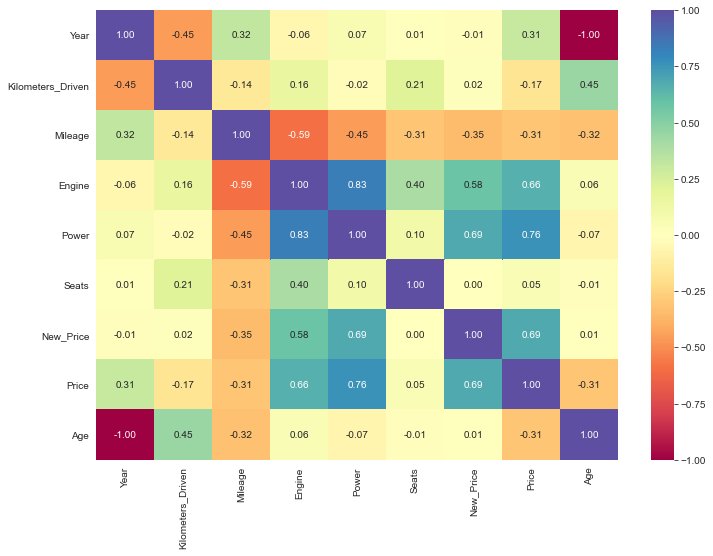

In [32]:
# Let's Start with a Heat Map for Numerical Variables first
plt.figure(figsize=(11.7, 8.27))
cdfhm = cdf.drop(['Name','Location','Owner_Type','Fuel_Type','Transmission'],axis=1)
#sns.heatmap(cdfhm.corr(), annot=True,cmap='Blues')

sns.heatmap(
    cdfhm.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

### Observations from HeatMap
1. Engine and Power show a very Strong Positive Correlation  
2. Power & Engine are showing a strong postive correlation with Price
3. Year of the Car shows slight positive correlation with Price
4. Mileage shows a negative correlation with Price
5. Kilometers_Driven shows a slightly negative correlation with Price

### Let's perform the bi-variate analysis between the Price vs the different Categorical Data

### Make vs Price Inferences

1. Prices of Maruti Cars are cheaper and more predicatable with less outliers,
2. Hyundai and Honda Cars are having more outliers with prices greater than upper whiskers of box plot
3. Cars from Audi, Land Rover and Porche have higher prices
4. The Pricey Cars have a larger IQR Range and some of these brands also have more data points outside the whiskers of Box plot
4. Ford Cars are Cheaper while they show more data points outside the whiskers of box plot

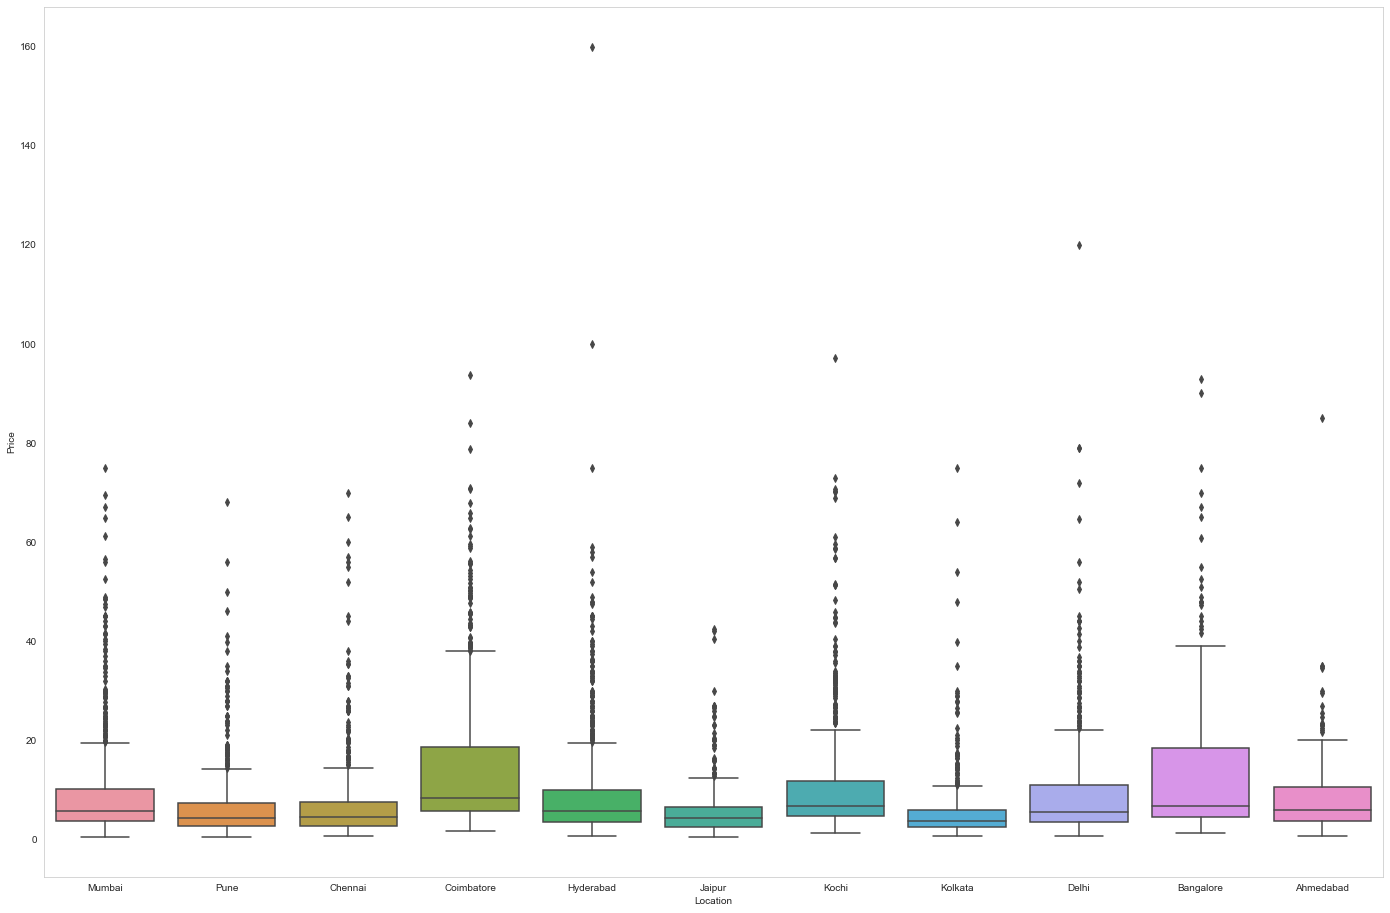

In [33]:
plt.figure(figsize=(24, 16))

sns.boxplot(x="Location", y="Price", data=cdf);

### Location vs Price Inferences

1. Across the Cities the prices are mostly distributed under the 15 Lakhs range, while there is a good amount of data that lie outside the 20 Lakh range
2. Coimbatore and Bangalore show a slightly larger skew towards the greater than 15 Lakhs range indicating availability/preference/demand towards costlier cars in these Cities


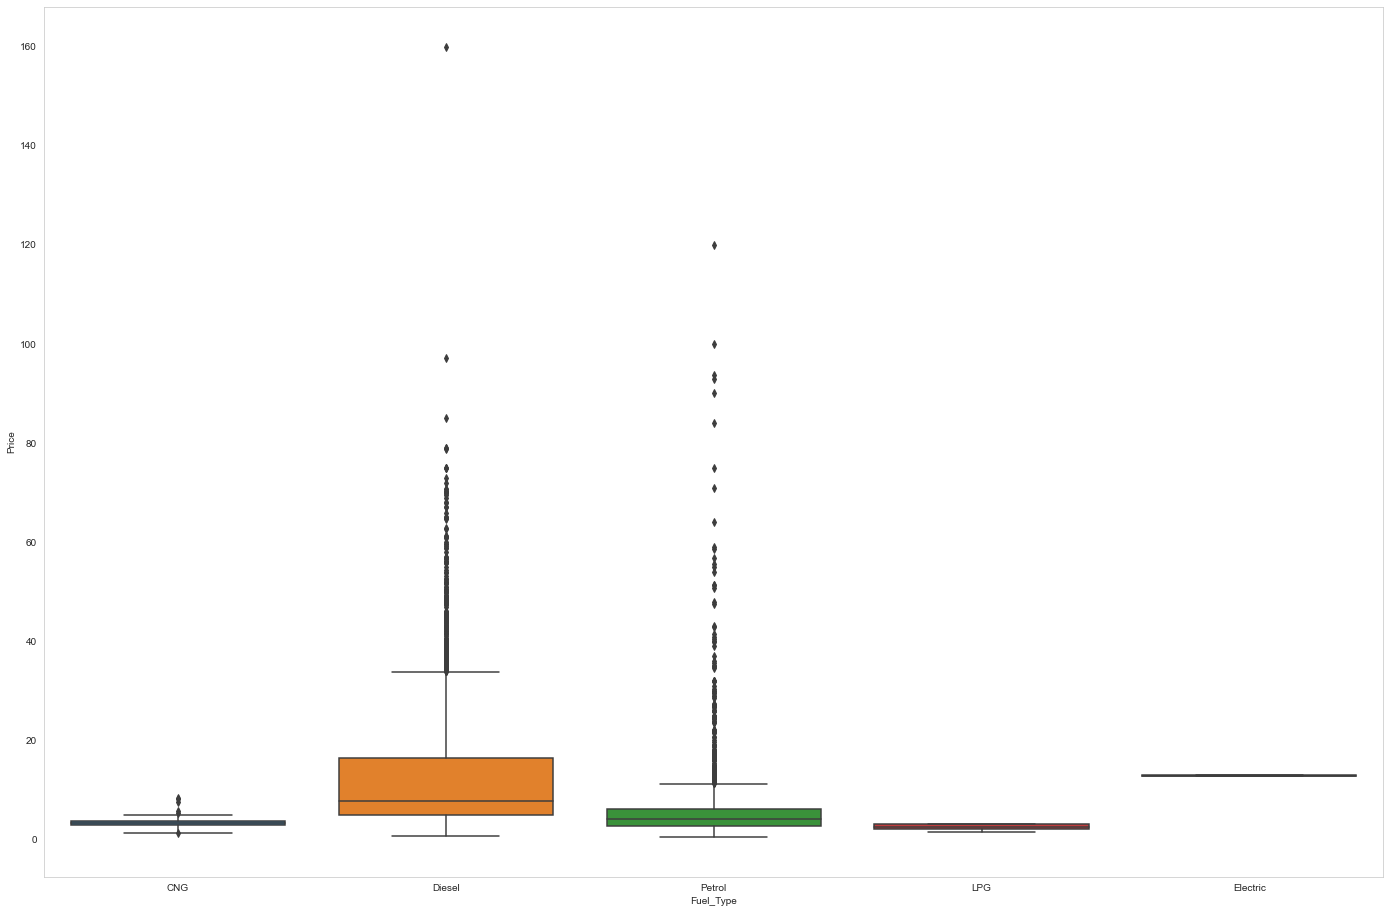

In [34]:
plt.figure(figsize=(24, 16))

sns.boxplot(x="Fuel_Type", y="Price", data=cdf);

### Fuel Type vs Price Inferences

1. CNG and LPG Cars have less data and are found to be cheaper  at less than 5 Lakhs averagge price for a used Car
2. Petrol Cars are Cheaper too with a mean price under 10 Lakhs, but have a larger amount of outliers outside the Inter Quartile Range
3. Diesel Used cars sell for a slightly larger Price as per our Domain knowledge and that trend is reflected in the Box Plot for Diesel Cars. The IQR range is elongated with a good number of outliers outside the IQR
4. Electric Cars are having less data and show up as ones with a higher price tag

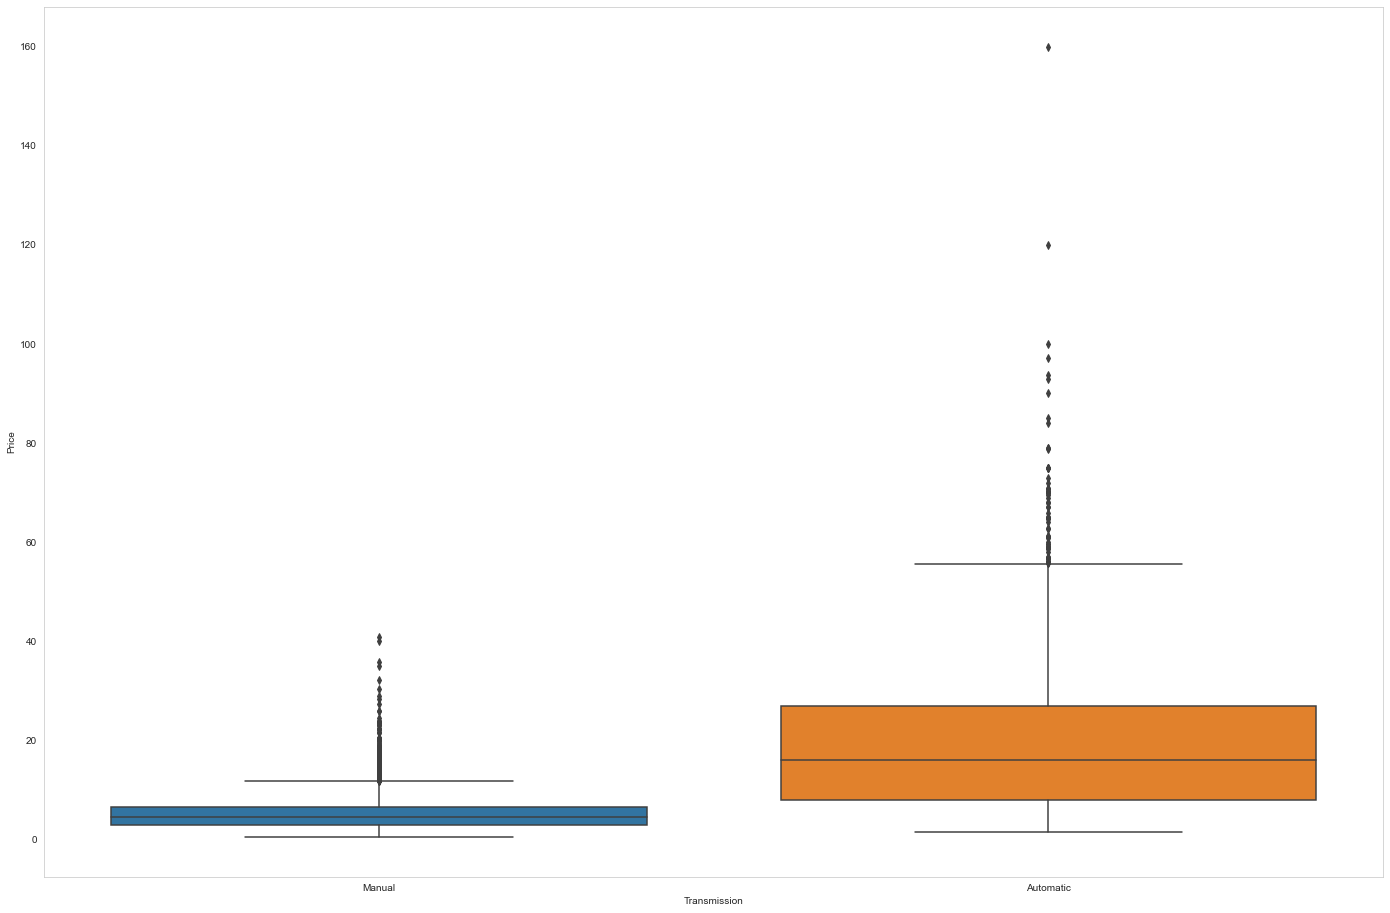

In [35]:
plt.figure(figsize=(24, 16))

sns.boxplot(x="Transmission", y="Price", data=cdf);

### Transmission  vs Price Inferences

1. Manual Transmission Cars have 50th Percentile at under 10 Lakhs
2. Automatic Transmission Cars have their 50th Percentile just under 20 Lakhs
3. Automatic Transmission Cars have slightly larger spread above the 50th Percentile with a good number of outliers above the IQR


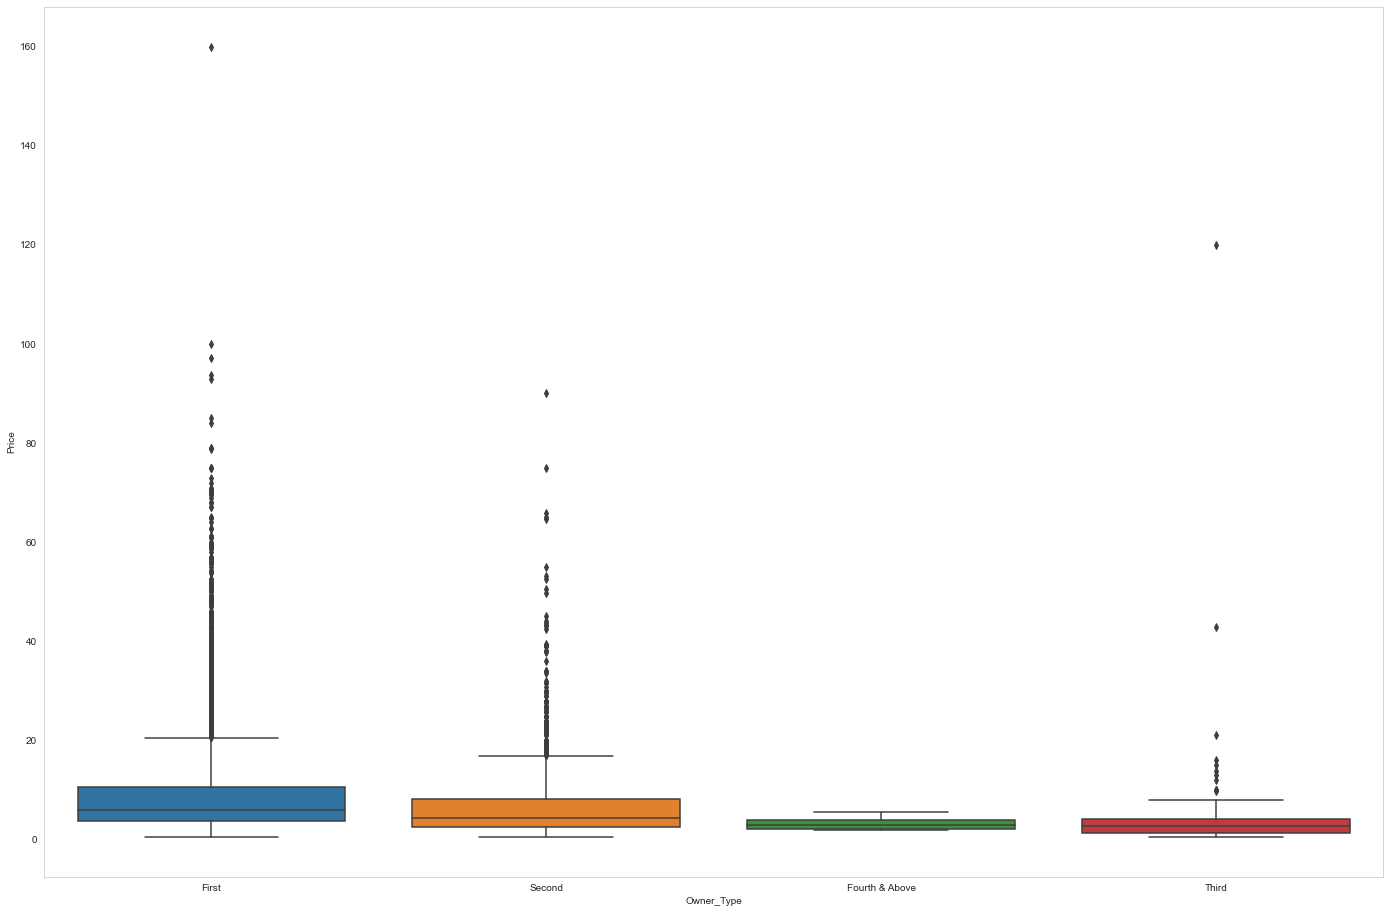

In [36]:
plt.figure(figsize=(24, 16))

sns.boxplot(x="Owner_Type", y="Price", data=cdf);

### Owner_Type  vs Price Inferences

1. Used Cars from First Owner command a higher mean price tag than the rest
2. The Greater the number of Owners a Car has been with, there is a lower mean price tag
3. The IQR is lower for Cars that have changed hands more times

### Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables

### Key Meaningful Observations

1. Power & Engine are showing a strong postive correlation with Price
2. Year of the Car shows slight positive correlation with Price
3. Mileage shows a negative correlation with Price
4. Kilometers_Driven shows a slightly negative correlation with Price
5. Coimbatore and Bangalore show a slightly larger skew towards the greater than 15 Lakhs range indicating availability/preference/demand towards costlier cars in these Cities
6. Automatic Transmission Cars have a higher mean price and a better spread of distribution in the 3Q and 4Q quartiles than Manual Transmission
Used Cars from First Owner command a higher mean price tag than the rest

### Data pre-processing
Data Preparation for Modelling - Missing value Treatment - Outlier Treatment - Feature Engineering

In [37]:
print(cdf.shape)
print('*******************Shape, Followed by Null Records*************')
cdf.isnull().sum(axis=0).sort_values(ascending=False)

(7252, 17)
*******************Shape, Followed by Null Records*************


New_Price            6246
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Model                   0
Make                    0
Age                     0
Name                    0
Location                0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Make_Model              0
dtype: int64

In [38]:
# Out of 7253 Cars, We do not have the Price of 6247 Cars, which is 86% of the total Inventory, It is safe to drop New_Price
cdf.drop(['New_Price'], axis=1, inplace=True)

### Missing Value Treatment

<Figure size 1728x1152 with 0 Axes>

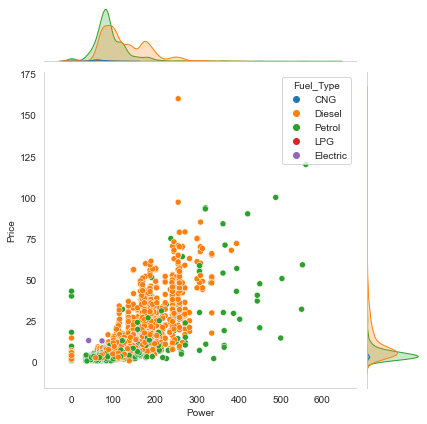

In [39]:
# We do not have Price Information for 1234 Records, This is huge. Lets evaluate the Price distribution as a Factor of Power and Fuel Type

plt.figure(figsize=(24, 16))
sns.jointplot(x='Power',y='Price',hue='Fuel_Type',data=cdf)



<Figure size 1728x1152 with 0 Axes>

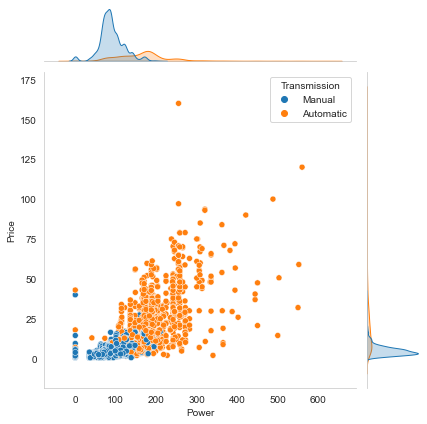

In [40]:
# We do not have Price Information for 1234 Records, This is huge. Lets evaluate the Price distribution as a Factor of Power and Transmission

plt.figure(figsize=(24, 16))
sns.jointplot(x='Power',y='Price',hue='Transmission',data=cdf)

<Figure size 1728x1152 with 0 Axes>

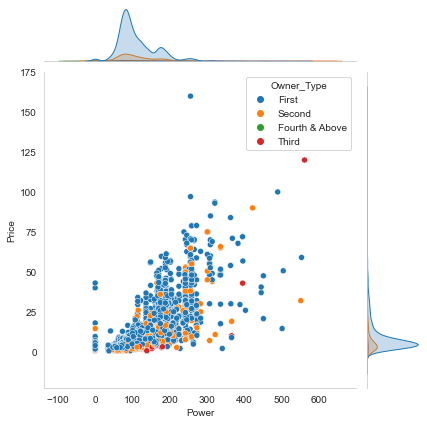

In [41]:
# We do not have Price Information for 1234 Records, This is huge. Lets evaluate the Price distribution as a Factor of Power and Owner_Type

plt.figure(figsize=(24, 16))
sns.jointplot(x='Power',y='Price',hue='Owner_Type',data=cdf)

In [42]:
# It is evident that we could apply the mean price of the Car based on Fuel_Type, Owner_Type and Transmission for Missing Values

meanPrice_by_Fuel_Type = cdf.groupby(['Owner_Type','Transmission','Fuel_Type'])['Price'].mean()

In [43]:
# Now, Let us use the Prices based on the calculated means for missing value treatment

def apply_price_by(curr_row):
    if np.isnan(curr_row['Price']):
        meanPrice = meanPrice_by_Fuel_Type[(curr_row['Owner_Type'],                                           
                                           curr_row['Transmission'],curr_row['Fuel_Type'])]
        return meanPrice
    else:
        return curr_row['Price']
        
cdf['Price'] = cdf.apply((lambda row : apply_price_by(row)),axis=1)


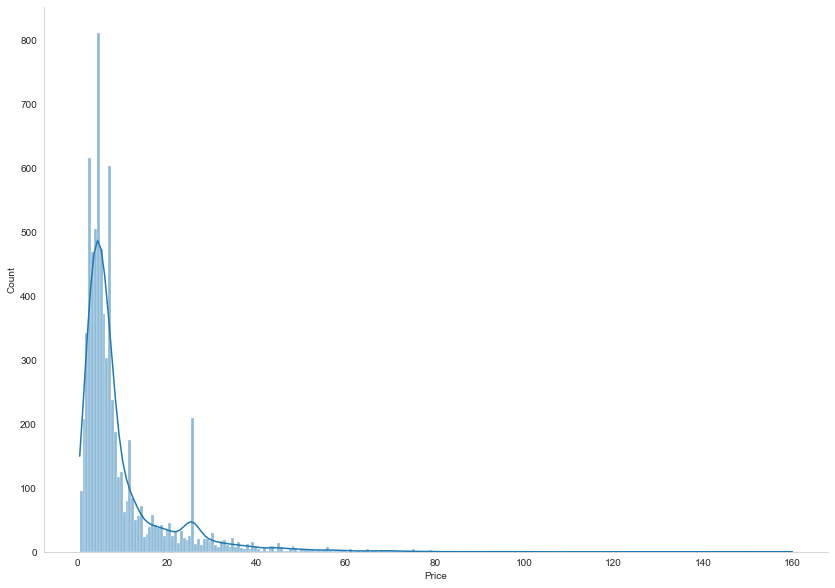

In [44]:
# Lets Revisit the Price distribution plot and check if there is any change in Price, The Price values are not showing a normal distribution and it might be prudent to doa  Log Transformatio
sns.displot(data=cdf,x='Price',kde=True,height=8.27, aspect=11.7/8.27)


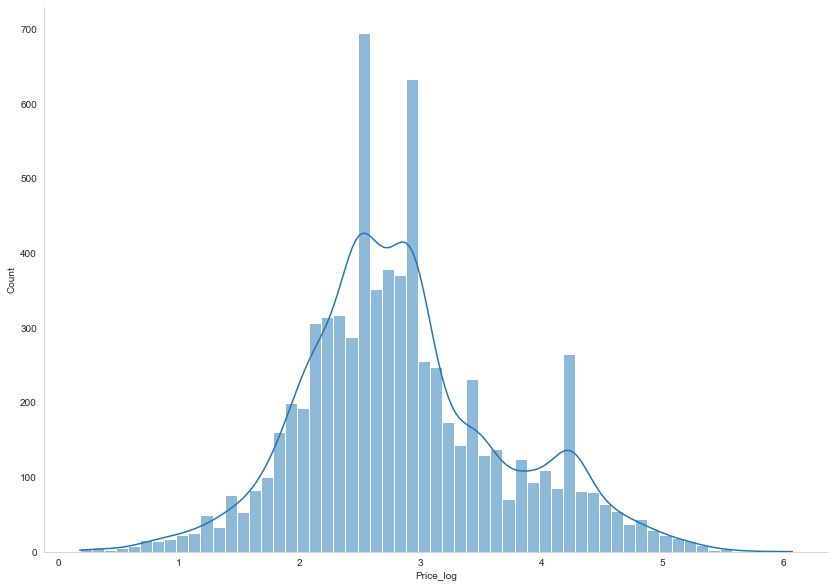

In [45]:
cdf['Price_log'] = np.log(cdf['Price']) + 1
sns.displot(data=cdf,x='Price_log',kde=True,height=8.27, aspect=11.7/8.27)


In [46]:
cdf.isnull().sum(axis=0).sort_values(ascending=False)

Seats                53
Engine               46
Power                46
Mileage               2
Make_Model            0
Model                 0
Make                  0
Age                   0
Price                 0
Name                  0
Location              0
Owner_Type            0
Transmission          0
Fuel_Type             0
Kilometers_Driven     0
Year                  0
Price_log             0
dtype: int64

In [47]:
# Now, Let us use the look at what are the car models that do not have Seat Information and using the domain knowledge,
def print_car_woseats(curr_row):
    if np.isnan(curr_row['Seats']):
        print(curr_row['Name'])
        
cdf.apply((lambda row : print_car_woseats(row)),axis=1)


Honda City 1.5 GXI
Maruti Swift 1.3 VXi
Ford Figo Diesel
Maruti Swift 1.3 VXi
Land Rover Range Rover 3.0 D
Honda City 1.3 DX
Maruti Swift 1.3 ZXI
Honda City 1.5 GXI
Land Rover Range Rover Sport 2005 2012 Sport
Honda City 1.5 EXI
Maruti Swift 1.3 LXI
Hyundai Santro LP zipPlus
Toyota Etios Liva V
Maruti Swift 1.3 VXI ABS
Maruti Swift 1.3 VXi
Maruti Estilo LXI
BMW 5 Series 520d Sedan
Hyundai Santro GLS II - Euro II
BMW 5 Series 520d Sedan
Maruti Swift 1.3 VXi
Maruti Wagon R Vx
Hyundai Santro GLS II - Euro II
Hyundai Santro GLS II - Euro II
BMW 5 Series 520d Sedan
Maruti Swift 1.3 VXi
BMW 5 Series 520d Sedan
Hyundai Santro GLS II - Euro II
Ford Endeavour Hurricane LE
Honda CR-V AT With Sun Roof
Maruti Estilo LXI
Fiat Punto 1.3 Emotion
Land Rover Range Rover 3.0 D
Hyundai Santro Xing XG
BMW 5 Series 520d Sedan
Honda Jazz Select Edition
Fiat Punto 1.2 Dynamic
Hyundai Santro Xing XG
Fiat Punto 1.4 Emotion
Maruti Swift 1.3 VXi
Maruti Swift 1.3 LXI
Honda City 1.5 GXI
Maruti Estilo LXI
Skoda Lau

0       None
1       None
2       None
3       None
4       None
        ... 
7248    None
7249    None
7250    None
7251    None
7252    None
Length: 7252, dtype: object

In [48]:
meanSeats = np.round(cdf['Seats'].mean())
cdf['Seats'] = cdf['Seats'].apply(lambda x : meanSeats if np.isnan(x) else x )

In [49]:
cdf.isnull().sum(axis=0).sort_values(ascending=False)

Engine               46
Power                46
Mileage               2
Make_Model            0
Model                 0
Make                  0
Age                   0
Price                 0
Seats                 0
Name                  0
Location              0
Owner_Type            0
Transmission          0
Fuel_Type             0
Kilometers_Driven     0
Year                  0
Price_log             0
dtype: int64

In [50]:
# Now, Let us use the look at what are the car models that do not have Seat Information and using the domain knowledge,
import re
p = re.compile('([0-9].[0-9])')

def transform_car_woengine(curr_row):
    ccVal = 0;
    if np.isnan(curr_row['Engine']):
        nameArray = curr_row['Name'].split(" ")
        for a in nameArray:
            m = p.match(a)   
            if m:
                ccVal = float(m.group()) * 1000
        if ccVal > 0:
            return ccVal
        else:
            return np.nan
    else:
        return curr_row['Engine']
                
        
cdf['Engine'] = cdf.apply((lambda row : transform_car_woengine(row)),axis=1)


In [51]:
cdf.isnull().sum(axis=0).sort_values(ascending=False)

Power                46
Engine               13
Mileage               2
Make_Model            0
Model                 0
Make                  0
Age                   0
Price                 0
Seats                 0
Name                  0
Location              0
Owner_Type            0
Transmission          0
Fuel_Type             0
Kilometers_Driven     0
Year                  0
Price_log             0
dtype: int64

In [52]:
cdf.sample(n=50)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make,Model,Make_Model,Price_log
3150,Maruti S Cross DDiS 320 Alpha,Delhi,2015,16.607,Diesel,Manual,First,22.70,1598.0,118.000000,5.0,7.650000,6,Maruti,S,MarutiS,3.034706
2206,Hyundai i20 1.2 Era,Kolkata,2015,35.000,Petrol,Manual,First,17.00,1197.0,80.000000,5.0,3.400000,6,Hyundai,i20,Hyundaii20,2.223775
2262,Toyota Etios GD,Bangalore,2012,58.253,Diesel,Manual,Second,23.59,1364.0,0.000000,5.0,4.450000,9,Toyota,Etios,ToyotaEtios,2.492904
6706,Maruti Swift Dzire VXi,Chennai,2012,158.000,Petrol,Manual,First,17.50,1298.0,85.800003,5.0,4.437796,9,Maruti,Swift,MarutiSwift,2.490158
5863,Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Mumbai,2015,48.600,Diesel,Automatic,First,12.00,2987.0,224.000000,7.0,48.500000,6,Mercedes-Benz,GL-Class,Mercedes-BenzGL-Class,4.881564
973,Maruti Wagon R LXI,Delhi,2007,65.000,Petrol,Manual,Second,18.90,998.0,67.099998,5.0,1.250000,14,Maruti,Wagon,MarutiWagon,1.223144
4511,Volkswagen Jetta 2007-2011 1.9 TDI Trendline,Chennai,2009,60.000,Diesel,Manual,First,15.00,1896.0,105.000000,5.0,4.000000,12,Volkswagen,Jetta,VolkswagenJetta,2.386294
4507,BMW 3 Series 320i,Pune,2009,40.000,Petrol,Automatic,Second,12.05,1995.0,154.000000,5.0,9.500000,12,BMW,3,BMW3,3.251292
3706,BMW 3 Series Luxury Line,Mumbai,2016,31.000,Diesel,Automatic,First,21.76,1995.0,190.000000,5.0,29.950000,5,BMW,3,BMW3,4.399529
3951,Maruti SX4 S Cross DDiS 320 Zeta,Mumbai,2016,38.000,Diesel,Manual,First,22.70,1598.0,118.000000,5.0,7.850000,5,Maruti,SX4,MarutiSX4,3.060514


In [53]:
# Now, Based on Research, we could deduce the Car Mapping against Engine Capacity and Power Rating, the only ambiguity in data is with Maruti Swift 1.3 which is indicative of a Fiat Multijet 1248 CC Engine, But Fuel Type is indicated as Petrol & Model is listed as VXi both of which Indicate the 1.2 Petrol

cars_df = pd.DataFrame([["Honda City 1.5",1497.0,120.0],
                       ["Honda City 1.3",1318.0,98.0],
                       ["Honda CR-V AT",2.4,185.0],
                       ["aruti Swift 1.3",1197.0,89.0],
                       ["Ford Fiesta 1.4",1388.0,69.0],
                       ["Land Rover Range Rover",2993.0,296.0],
                       ["Hyundai Santro",1086.0,68.0],
                       ["Toyota Etios",1197.0,79.0],                      
                       ["BMW 5 Series 520d",2000.0,187.0],
                       ["Maruti Wagon",998.0,67.0],
                       ["Fiat Punto 1.3",1248.0,90.0],
                       ["Honda Jazz Select",1198.0,89.0],
                       ["Fiat Punto 1.4 Emotion",1368.0,89.0],
                       ["Skoda Laura 1.8 TSI",1798.0,158.0],
                       ["Hyundai i20 new Sportz AT",1396.0,99.0],
                       ["Mahindra TUV 300 P4",120.0,120.0]],
                   columns=['Model', 'EngineCC', 'EnginePower'])
names = cars_df['Model']

def fill_engine_4na(curr_row):  
        if np.isnan(curr_row['Engine']):
            for name in names:
                if curr_row['Name'].startswith(name):
                    return float(cars_df.loc[cars_df['Model'] == name]['EngineCC'])
        else:
            return float(curr_row['Engine'])

def fill_power_4na(curr_row):   
        pow = 0;
        if np.isnan(curr_row['Power']):
            for name in names:
                if curr_row['Name'].startswith(name):
                    pow = float(cars_df.loc[cars_df['Model'] == name]['EnginePower'])
                    break;
        else:
            pow = curr_row['Power']
        return float(pow)
        
cdf['Power'] = cdf.apply(lambda row : fill_power_4na(row),axis=1)
cdf['Engine'] = cdf.apply(lambda row : fill_engine_4na(row),axis=1)



In [54]:
cdf.isnull().sum(axis=0).sort_values(ascending=False)

Mileage              2
Name                 0
Power                0
Make_Model           0
Model                0
Make                 0
Age                  0
Price                0
Seats                0
Engine               0
Location             0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Price_log            0
dtype: int64

In [55]:
cut_labels = ['compact', 'midsize', 'fullsize_suv']
cut_bins = [0, 1200, 2000, 10000]
cdf['Engine_Cat'] = pd.cut(cdf['Engine'], bins=cut_bins, labels=cut_labels)

In [56]:
def which_car_womileage(curr_row):  
    try:
        if curr_row['Mileage'] == 0 or np.isnan(curr_row['Mileage']):
            print(curr_row['Name'] +"--" + str(curr_row['Mileage']))
    except:
        print(curr_row['Name'] +"--" + str(curr_row['Mileage']))
#cdf.apply((lambda row : which_car_womileage(row)),axis=1)     
meanMileage = cdf['Mileage'].mean()

cdf['Mileage'] = cdf['Mileage'].apply(lambda x: meanMileage if x == 0 else x)


In [57]:
# For the 2 Cars without Mileage Information, We will code them directly into the Data Frame based on Domain Knowledge
cdf.loc[cdf['Name'] == 'Mahindra E Verito D4',['Mileage']] = 110;
cdf.loc[cdf['Name'] == 'Toyota Prius 2009-2016 Z4',['Mileage']] = 24;

In [58]:
cdf.isnull().sum(axis=0).sort_values(ascending=False)

# That Completes the Missing value treatment for of the data
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   object  
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   float64 
 4   Fuel_Type          7252 non-null   object  
 5   Transmission       7252 non-null   object  
 6   Owner_Type         7252 non-null   object  
 7   Mileage            7252 non-null   float64 
 8   Engine             7252 non-null   float64 
 9   Power              7252 non-null   float64 
 10  Seats              7252 non-null   float64 
 11  Price              7252 non-null   float64 
 12  Age                7252 non-null   int64   
 13  Make               7252 non-null   object  
 14  Model              7252 non-null   object  
 15  Make_Model         7252 non-null   object  
 16  Price_

In [59]:
cdf.sample(n=100)

cdft = pd.get_dummies(cdf['Fuel_Type'], drop_first=False)
cdft.sample(n=10)

,CNG,Diesel,Electric,LPG,Petrol
6040,0,0,0,0,1
2491,0,0,0,0,1
304,0,1,0,0,0
1101,0,1,0,0,0
6032,0,1,0,0,0
6188,0,1,0,0,0
4484,0,1,0,0,0
6253,0,1,0,0,0
5105,0,1,0,0,0
5987,0,0,0,0,1


In [60]:
mdft = pd.get_dummies(cdf['Fuel_Type'], drop_first=True)
mdft.sample(n=10)

,Diesel,Electric,LPG,Petrol
2737,0,0,0,1
2886,0,0,0,1
3435,0,0,0,1
1358,0,0,0,1
608,1,0,0,0
3414,0,0,0,1
5736,0,0,0,1
5800,1,0,0,0
6849,0,0,0,1
2665,0,0,0,1


In [61]:
cdf['Location'].value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       590
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [62]:
tier1 = ['Mumbai','Chennai','Delhi','Kolktata','Bangalore']
def transform_loc(val):
    try:
        if tier1.index(val) > -1:
            return 1
    except:
        return 0
cdf['Location-cat'] = cdf['Location'].apply(transform_loc)
#cdf['Location-cat'].value_counts()
cdf['Location-cat'].value_counts()

0    4613
1    2639
Name: Location-cat, dtype: int64

In [63]:
# Now its time to transform some of the Categorical Values, We will use One Hot Encoding for Fields like Transmission, 
# Fuel_Type, Owner_Type and Location which seem to have a direct bearing on the Price of the Car

cdt = pd.get_dummies(cdf['Transmission'], drop_first=False)
cdf_new = pd.merge(cdf, cdt, left_index=True, right_index=True)
                                                 
cdft = pd.get_dummies(cdf['Fuel_Type'], drop_first=True)
cdf_new = pd.merge(cdf_new, cdft, left_index=True, right_index=True)

cdot = pd.get_dummies(cdf['Owner_Type'], drop_first=True)
cdf_new = pd.merge(cdf_new, cdot, left_index=True, right_index=True)

label_encoder = preprocessing.LabelEncoder()

# The Make & Model of the Car could be Label Encoded
cdf_new['Make_Model_LE']= label_encoder.fit_transform(cdf['Make_Model']) 

# We could do one hot encoding of the Engine Categories as Compact, MidSize and Full Size/SUV
cdec = pd.get_dummies(cdf_new['Engine_Cat'], drop_first=True)
cdf_new = pd.merge(cdf_new, cdec, left_index=True, right_index=True)

# We could label encode the Engine Categories as Compact, MidSize and Full Size/SUV
cut_labels = ['5Seater', '7Seater', 'Van']
cut_bins = [0, 5, 7, 15]

cdf_new['Seat_Cat'] = pd.cut(cdf_new['Seats'], bins=cut_bins, labels=cut_labels)
# Now, lets apply one hot encoding on seat_categories also
sdec = pd.get_dummies(cdf_new['Seat_Cat'], drop_first=True)
cdf_new = pd.merge(cdf_new, sdec, left_index=True, right_index=True)

### Outlier Treatment

In [64]:
# The Used Car Price is a Combination of Multiple Factors and outliers could not be Generalised. The Best way to look at Outliers is by looking at the Make/Model of a Car and the Age of the Car
# Lets start by looking at the Models
cdf_new['Make_Model'].value_counts()

MarutiSwift       418
HondaCity         318
Hyundaii20        303
ToyotaInnova      203
HyundaiVerna      200
                 ... 
FiatSiena           1
Nissan370Z          1
FordMustang         1
SmartFortwo         1
MahindraXUV300      1
Name: Make_Model, Length: 223, dtype: int64

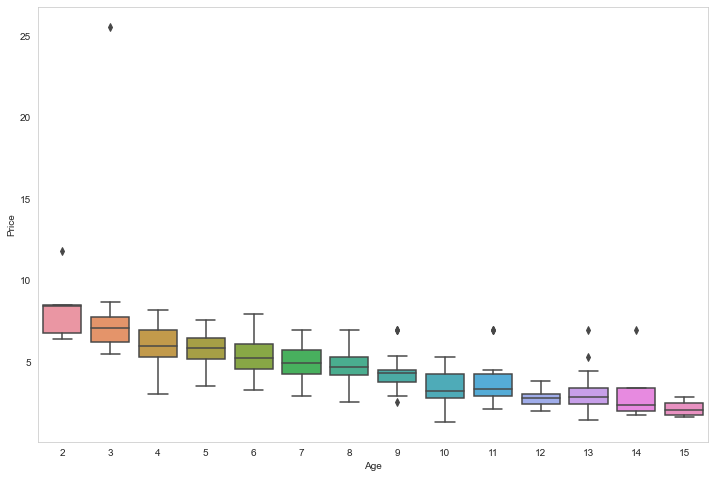

In [65]:
# Lets do a Box Plot
plt.figure(figsize=(12, 8))

cdf_MarutiSwift = cdf_new[cdf_new['Make_Model']=='MarutiSwift']
sns.boxplot(x="Age", y="Price", data=cdf_MarutiSwift)
# As you can see, within the Age Groups, we see outliers on either side of the IQR Range. We could adjust the Prices of such values to the mean
meanPrice = cdf_new.groupby('Make_Model')['Price'].mean()
stdevP = cdf_new.groupby('Make_Model')['Price'].std()

# The Characteristics of a Used Car are a combination of multiple variables and within the limited data set it would be very difficult to perform Proper Outlier Treatment
# Lets not do over engineering of outliers

In [66]:
def fillMeanPrice(curr_row):   
        newP = 0;
        meanP = meanPrice[curr_row['Make_Model']]
        stdP = stdevP[curr_row['Make_Model']]
        if curr_row['Price'] > (3*stdP) :
            newP = meanP
        else:
            newP = curr_row['Price']
        return newP
        
cdf_new['Price'] = cdf_new.apply(lambda row : fillMeanPrice(row),axis=1)

#cdf_new['Price_log'] = np.log(cdf_new['Price']) + 1

## The Outlier treatment is marginially reducing the Model accuracy, so the data is retained as is and re-iterated

In [67]:
# We see a fairly normal distribution, let us look at the statistics
cdf_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.364865,3.254365,1996.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,7252.0,57.810853,37.499537,0.171000,34.000000,53.404000,73.000000,775.000000
Mileage,7252.0,18.357987,4.272609,6.400000,15.400000,18.160000,21.100000,110.000000
Engine,7252.0,2183.941451,16649.685998,2.400000,1198.000000,1493.000000,1968.000000,520000.000000
Power,7252.0,110.624405,55.296669,0.000000,74.000000,91.199997,138.029999,616.000000
Seats,7252.0,5.277716,0.809088,0.000000,5.000000,5.000000,5.000000,10.000000
Price,7252.0,8.347886,8.896553,0.440000,3.500000,5.166825,8.500000,120.000000
Age,7252.0,7.635135,3.254365,2.000000,5.000000,7.000000,10.000000,25.000000
Price_log,7252.0,2.850695,0.841870,0.179019,2.321756,2.749200,3.297824,6.075174
Location-cat,7252.0,0.363900,0.481153,0.000000,0.000000,0.000000,1.000000,1.000000


### Model building - Linear Regression
1. Build the model and comment on the model statistics 
2. Print model coefficients with column names in a dataframe - 
3. Identify the key variables that have a strong relationship with dependent variable

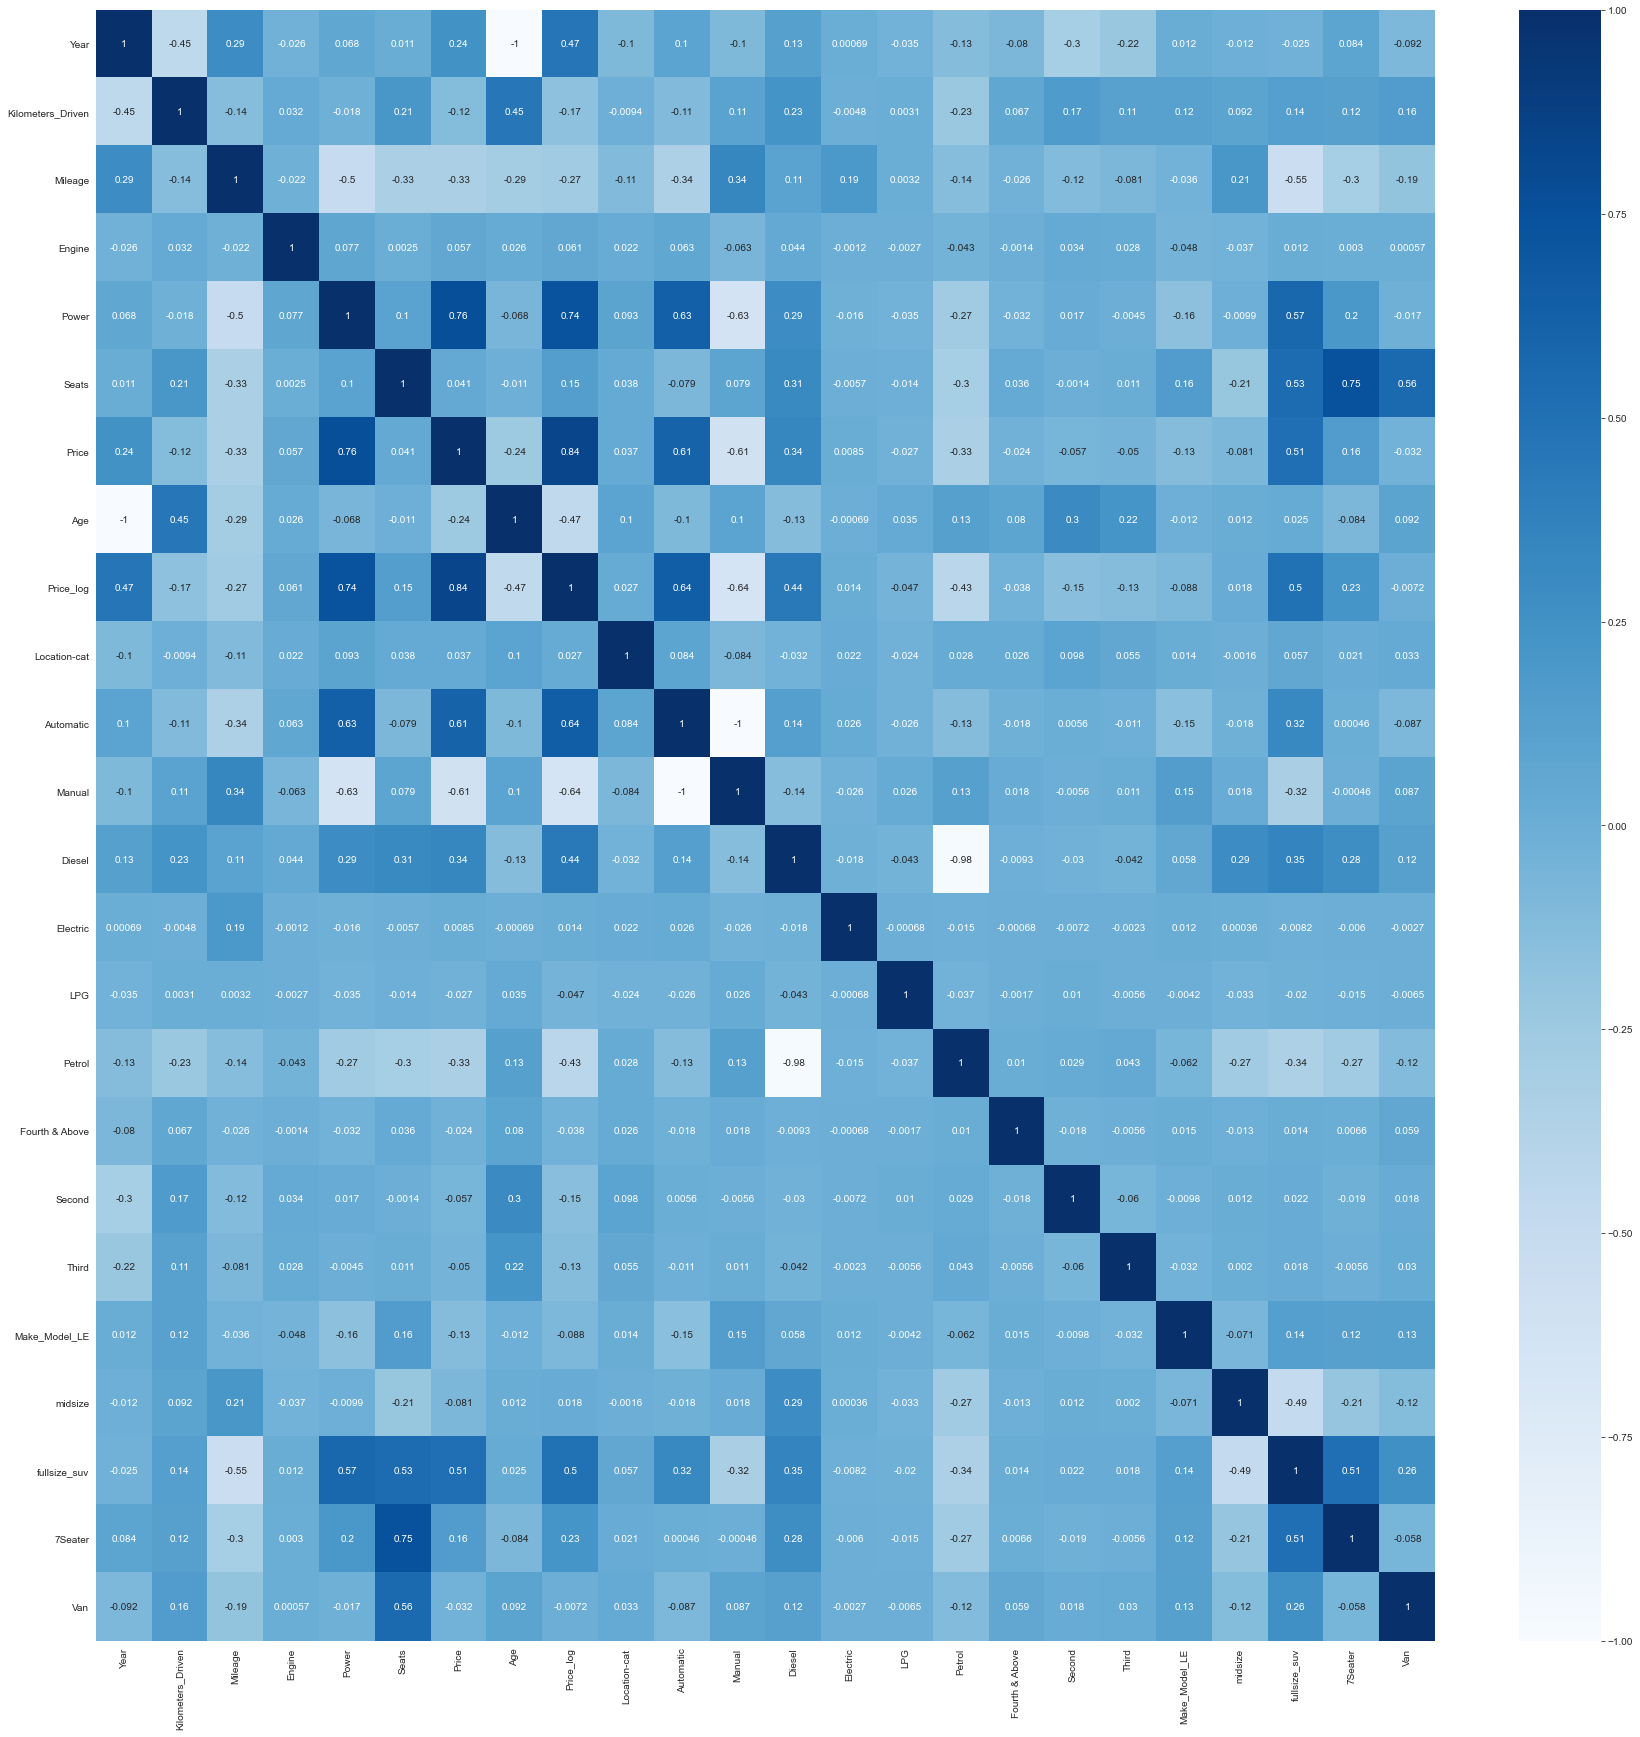

In [68]:
#Let's Revisit the HeatMap

#cdf_new.drop(['Seats','Engine','Year','Price','Seats'],axis=1,inplace=True)

plt.figure(figsize=(30, 30))
sns.heatmap(cdf_new.corr(),annot=True,cmap="Blues")
plt.show()

10


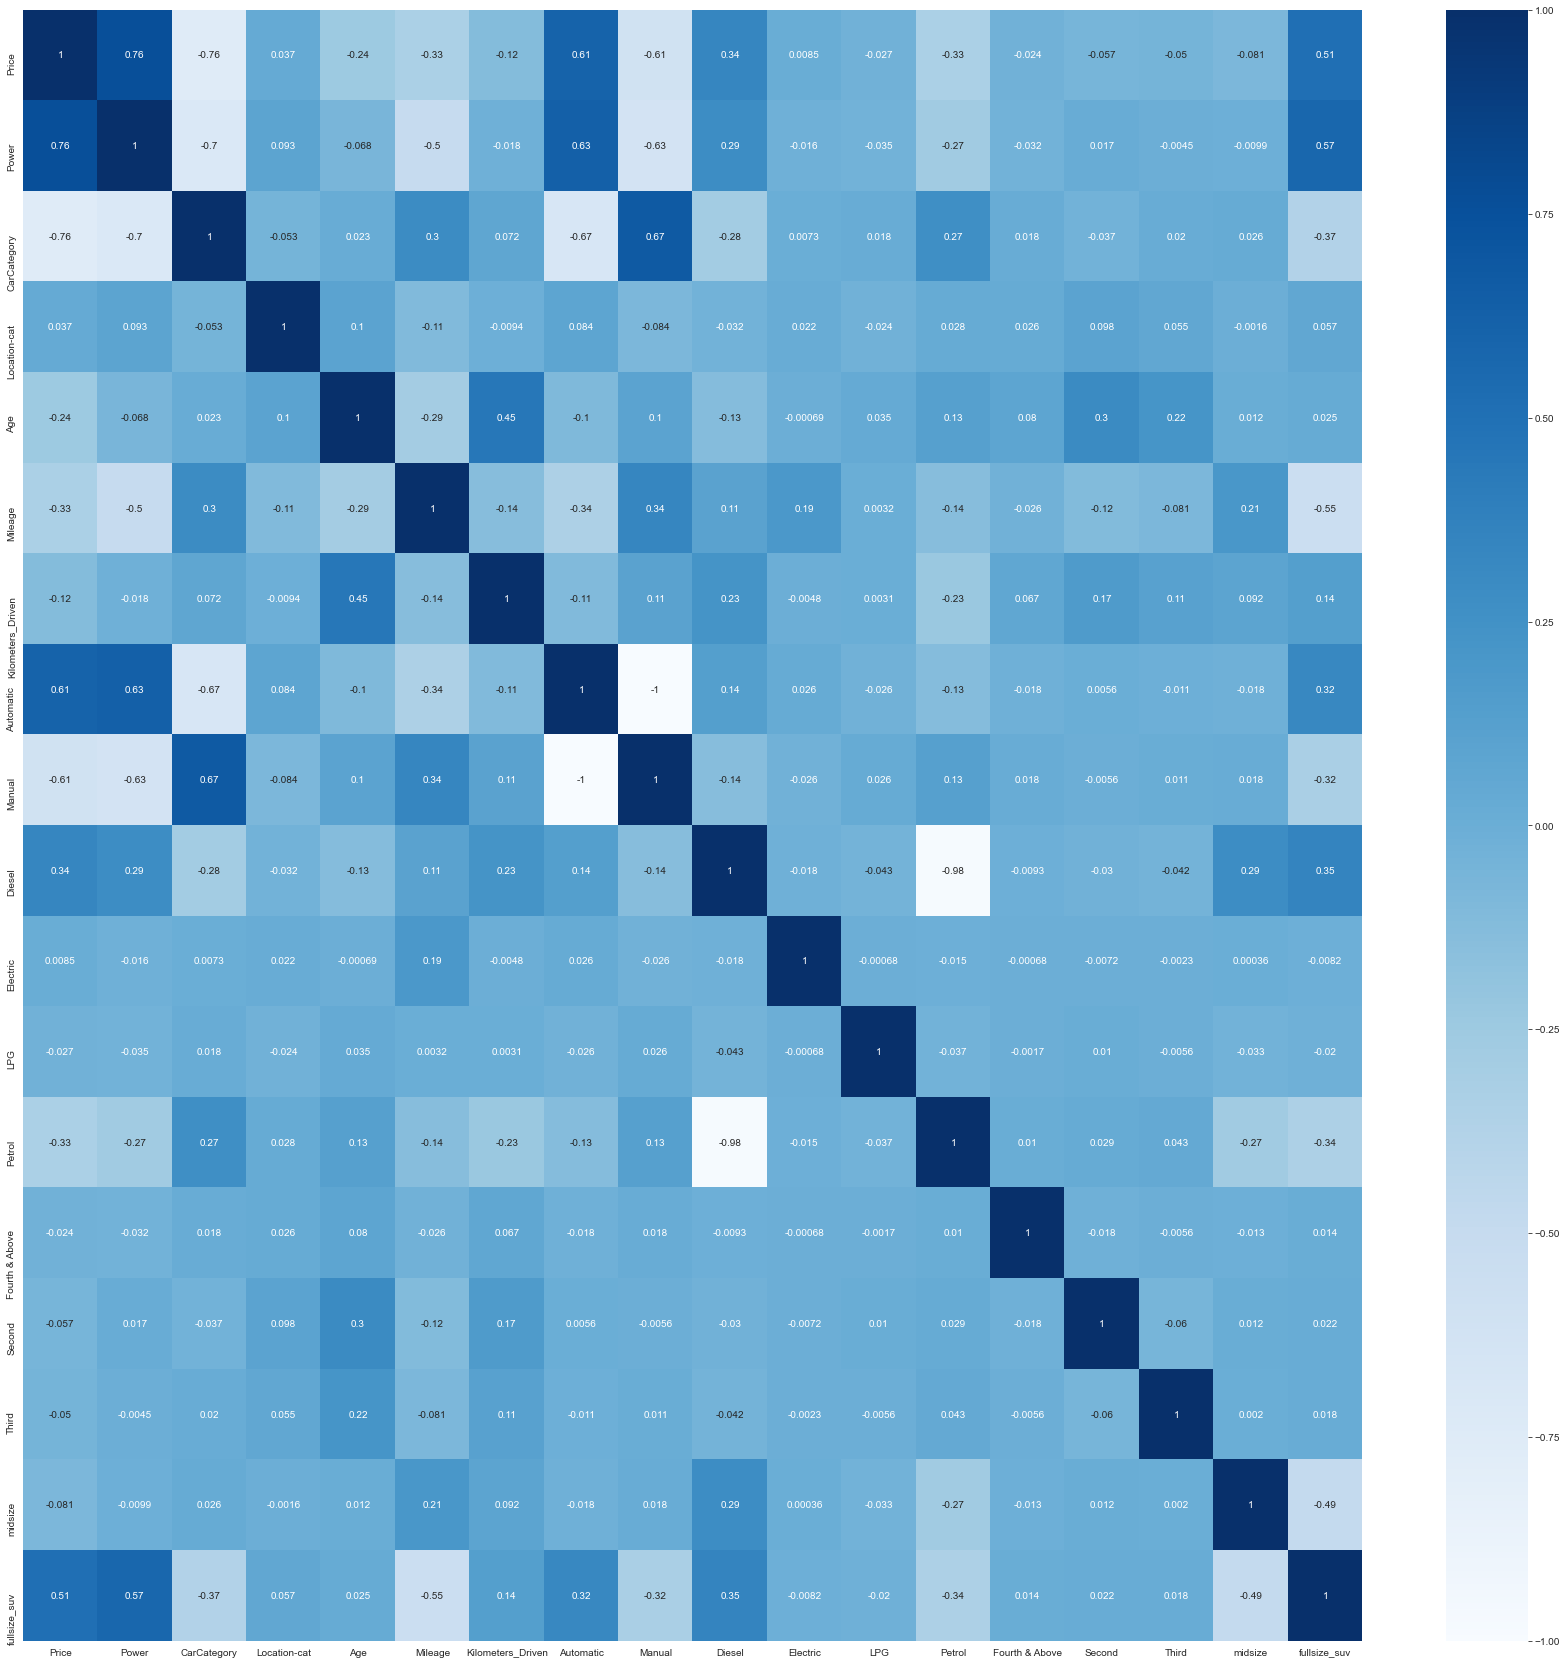

In [69]:
# Let us Introduce a Brand Cateogry as Mid & Luxury Segments to Re-Iterate the Model based on an additional Brand Category sans some of the Location columns, which does not seem to have any strong Correlation
brand_categories = {'Mid','Luxury'}
midList = ['Ambassador','Chevrolet','Datsun','ISUZU','Isuzu','Force','Ford','Fiat','Hindustan','Honda','Hyundai','Jeep','Mahindra','Maruti','Mitsubishi','OpelCorsa','Renault','Skoda','Smart','Tata','Toyota','Volkswagen','Nissan']
luxuryList = ['Audi','BMW','Bentley','Land','Lamborghini','Jaguar','Mercedes-Benz','Mini','Volvo','Porsche',]

cdf_new['Make'].value_counts(ascending=False)
print(midList.index('Hyundai'))
def car_category(curr):
    try:
        if midList.index(curr['Make']) > -1:
            return 1
        else:
            return 0
    except:
        return 0
      
cdf_new['CarCategory'] = cdf_new.apply(lambda row : car_category(row),axis=1)    

      # 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
      # 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune',
      # 'Make_Model_LE', 
cdf_v2 = cdf_new[['Price','Power','CarCategory','Location-cat','Age','Mileage','Kilometers_Driven','Automatic','Manual', 'Diesel', 'Electric', 'LPG', 'Petrol', 'Fourth & Above',
       'Second', 'Third','midsize', 'fullsize_suv']]


plt.figure(figsize=(30, 30))
sns.heatmap(cdf_v2.corr(),annot=True,cmap="Blues")
plt.show()

### Observations for Model-2

1. The Power of the Car shows a Strong Positive Correlation with Price
2. The CarCategory as Budget shows a Strong Negative Correlation with Price(The Luxury Category is represented with Zero value)
3. The Age of the Car has slightly negative correlation with Price
4. Mileage of the car has slightly negative correlation with Price
5. Full Size/Suv with higher Engine Capacity has a Positive Correlation with Price
6. Automatic Transmission has a strong Postiive Correlation on Price

In [70]:
cdf_new['Make_Model'].value_counts(ascending=False)


MarutiSwift       418
HondaCity         318
Hyundaii20        303
ToyotaInnova      203
HyundaiVerna      200
                 ... 
FiatSiena           1
Nissan370Z          1
FordMustang         1
SmartFortwo         1
MahindraXUV300      1
Name: Make_Model, Length: 223, dtype: int64

In [71]:
# Remove the Categorical Data for now and build Linear Regression - Iteration-1
# Name,Location,Fuel_Type,Transmission,Owner_Type,Make

X = cdf_new.drop(['Age','Price','Price_log','Engine','Name','Location','Fuel_Type','Transmission','Owner_Type','Make','Make_Model','Make_Model_LE','Model','Engine_Cat','Seat_Cat'], axis=1)
y = cdf_new['Price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

X_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,5076.0,2013.369582,3.229503,1996.000,2011.0,2014.000000,2016.000000,2019.00
Kilometers_Driven,5076.0,57.782896,37.949314,0.171,34.0,53.000000,73.201000,775.00
Mileage,5076.0,18.363728,4.175599,7.810,15.4,18.200000,21.100000,33.54
Power,5076.0,110.859371,55.289872,0.000,74.0,92.699997,138.029999,616.00
Seats,5076.0,5.286052,0.810115,2.000,5.0,5.000000,5.000000,10.00
Location-cat,5076.0,0.365248,0.481547,0.000,0.0,0.000000,1.000000,1.00
Automatic,5076.0,0.278172,0.448143,0.000,0.0,0.000000,1.000000,1.00
Manual,5076.0,0.721828,0.448143,0.000,0.0,1.000000,1.000000,1.00
Diesel,5076.0,0.532506,0.498991,0.000,0.0,1.000000,1.000000,1.00
Electric,5076.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.00


In [73]:
regression_model_A = LinearRegression()
regression_model_A.fit(X_train,y_train)



LinearRegression()

In [74]:
# Model Performance Evaluation API is available in Anime Rating Prediction Class Notes that provides an API which could be reused to consolidate the Model Performance Metrics into a Pandas DF

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Re-usable Function from Anime Case Study, most of the API are already available and built which are re-used here

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Model Performance Check

In [75]:
# Let us Compare the Performance of the 2 Models
# Checking model performance on train set
print("Training Performance of Model-A(Y=Price) \n")
lin_reg_model_train_perf_A = model_performance_regression(regression_model_A, X_train, y_train)
lin_reg_model_train_perf_A

Training Performance of Model-A(Y=Price) 



,RMSE,MAE,R-squared,Adj. R-squared
0,4.282926,2.411491,0.76,0.75905


In [76]:
# Let us Compare the Performance of the 2 Models
# Checking model performance on train set
print("Test Performance of Model-A \n")
lin_reg_model_train_perf_A = model_performance_regression(regression_model_A, X_test, y_test)
lin_reg_model_train_perf_A

Test Performance of Model-A 



,RMSE,MAE,R-squared,Adj. R-squared
0,4.776851,2.463083,0.732967,0.730488


In [77]:
X_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats',
       'Location-cat', 'Automatic', 'Manual', 'Diesel', 'Electric', 'LPG',
       'Petrol', 'Fourth & Above', 'Second', 'Third', 'midsize',
       'fullsize_suv', '7Seater', 'Van', 'CarCategory'],
      dtype='object')

In [78]:
X_v2 = cdf_v2.drop(['Price'], axis=1)
y_v2 = cdf_v2['Price']


In [79]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_v2, y_v2, test_size=0.30, random_state=1
)

In [80]:
cdf_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              7252 non-null   float64
 1   Power              7252 non-null   float64
 2   CarCategory        7252 non-null   int64  
 3   Location-cat       7252 non-null   int64  
 4   Age                7252 non-null   int64  
 5   Mileage            7252 non-null   float64
 6   Kilometers_Driven  7252 non-null   float64
 7   Automatic          7252 non-null   uint8  
 8   Manual             7252 non-null   uint8  
 9   Diesel             7252 non-null   uint8  
 10  Electric           7252 non-null   uint8  
 11  LPG                7252 non-null   uint8  
 12  Petrol             7252 non-null   uint8  
 13  Fourth & Above     7252 non-null   uint8  
 14  Second             7252 non-null   uint8  
 15  Third              7252 non-null   uint8  
 16  midsize            7252 

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 62 to 5158
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5076 non-null   int64  
 1   Kilometers_Driven  5076 non-null   float64
 2   Mileage            5076 non-null   float64
 3   Power              5076 non-null   float64
 4   Seats              5076 non-null   float64
 5   Location-cat       5076 non-null   int64  
 6   Automatic          5076 non-null   uint8  
 7   Manual             5076 non-null   uint8  
 8   Diesel             5076 non-null   uint8  
 9   Electric           5076 non-null   uint8  
 10  LPG                5076 non-null   uint8  
 11  Petrol             5076 non-null   uint8  
 12  Fourth & Above     5076 non-null   uint8  
 13  Second             5076 non-null   uint8  
 14  Third              5076 non-null   uint8  
 15  midsize            5076 non-null   uint8  
 16  fullsize_suv       5076

In [82]:
regression_model_B = LinearRegression()
regression_model_B.fit(X2_train,y2_train)

LinearRegression()

In [83]:
print("Train Performance of Model-B \n")

lin_reg_model_train_perf_B = model_performance_regression(regression_model_B, X2_train, y2_train)
lin_reg_model_train_perf_B

Train Performance of Model-B 



,RMSE,MAE,R-squared,Adj. R-squared
0,4.344783,2.416934,0.753018,0.752187


In [84]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [85]:
# Checking model performance on train set
print("Test Performance\n")
print(model_perf(regression_model_B, X2_test, y2_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.007479  2.501766  0.706559      0.704248


In [86]:
print("Test Performance of Model-B \n")
lin_reg_model_train_perf_B = model_performance_regression(regression_model_B, X2_test, y2_test)
lin_reg_model_train_perf_B

Test Performance of Model-B 



,RMSE,MAE,R-squared,Adj. R-squared
0,5.007479,2.501766,0.706559,0.704248


### Model Co-efficients

In [87]:
# The Model Co-efficients for Model-A could be Fit into a Data Frame is as solved in Anime Rating Case Study
coef_df = pd.DataFrame(
    np.append(regression_model_A.coef_.flatten(), regression_model_A.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,5.296569e-01
Kilometers_Driven,-6.315687e-03
Mileage,-1.367200e-01
Power,4.603781e-02
Seats,-3.348059e+00
Location-cat,-1.299300e-01
Automatic,4.208010e-01
Manual,-4.208010e-01
Diesel,1.412447e+00
Electric,-1.776357e-15


In [88]:
# The Model Co-efficients for Model-B could be Fit into a Data Frame is as solved in Anime Rating Case Study
coef_df = pd.DataFrame(
    np.append(regression_model_B.coef_.flatten(), regression_model_B.intercept_),
    index=X2_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Power,4.944886e-02
CarCategory,-1.025295e+01
Location-cat,-1.595803e-01
Age,-5.267751e-01
Mileage,-1.196202e-01
Kilometers_Driven,-7.402377e-03
Automatic,4.016116e-01
Manual,-4.016116e-01
Diesel,8.830886e-01
Electric,2.220446e-16


### Observations
1. The R-Squared and Adjusted R-Squared are trending towards 1
2. The New_Price column showed a strong positive correlation with Price of the Car, Additional historic data collection exercise from the Domain could improve the performance of the Model
3. The Actual Sale Data could help predict the buyer behaviour better on the Model
4. Both Models are performing better, with Model_A being Slightly better on R Squared 

### Conclusions
1. Powerful Cars command a Premium Price in the Used Car Market
2. Diesel Cars & Automatic Transmission Cars get a Good Price
3. Single Owner Cars have a better Re-sell value than Cars that have changed hands more than Once
4. Age of the Car determines the Price of a Used Car(lesser the better)
5. The Budget/Luxury Categorisation has a strong effect on the Price of the Car